# LENDING CLUB CASE STUDY

### Business Objectives

Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Lending loans to ‘risky’ applicants is the largest source of credit loss. The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the Lending Club wants to understand the indicators of  strong driver variables behind loan default.

In [1]:
#If chart_studio was not installed earlier, please execute this statement
!pip install chart_studio

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict

import chart_studio as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## 1. Data Loading

In [3]:
#Reading the main file loan.csv
df=pd.read_csv('loan.csv',low_memory=False)
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

## 2. Data Understanding

In [4]:
df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [5]:
#Checking no of rows and columns in the data
df.shape

(39717, 111)

### a. Columns and Datatypes Analysis

In [6]:
#Checking counts of numeric features
numeric_feature=df.select_dtypes(include=[np.number])
print(len(numeric_feature.columns))
print(numeric_feature.columns)
df.select_dtypes(include=np.number).head(2)

87
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
 

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  installment  \
0  1077501    1296599       5000         5000           4975.0       162.87   
1  1077430    1314167       2500         2500           2500.0        59.83   

   annual_inc    dti  delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
0     24000.0  27.65            0               1  ...                 NaN   
1     30000.0   1.00            0               5  ...                 NaN   

   num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
0                 NaN             NaN               NaN                   0.0   
1                 NaN             NaN               NaN                   0.0   

   tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
0        0.0              NaN                NaN             NaN   
1        0.0              NaN                NaN             NaN   

   total_il_high_credit_limit  
0                         NaN  
1                         NaN  

[2 rows x 87 columns]

In [7]:
#Checking counts of non numeric features
non_numeric_feature=df.select_dtypes(include=[object])
print(len(non_numeric_feature.columns))
print(non_numeric_feature.columns)
df.select_dtypes(include=object).head(2)

24
Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type'],
      dtype='object')


term int_rate grade sub_grade emp_title emp_length home_ownership  \
0   36 months   10.65%     B        B2       NaN  10+ years           RENT   
1   60 months   15.27%     C        C4     Ryder   < 1 year           RENT   

  verification_status issue_d  loan_status  ...     title zip_code addr_state  \
0            Verified  Dec-11   Fully Paid  ...  Computer    860xx         AZ   
1     Source Verified  Dec-11  Charged Off  ...      bike    309xx         GA   

  earliest_cr_line revol_util initial_list_status last_pymnt_d next_pymnt_d  \
0           Jan-85     83.70%                   f       Jan-15          NaN   
1           Apr-99      9.40%                   f       Apr-13          NaN   

  last_credit_pull_d application_type  
0             May-16       INDIVIDUAL  
1             Sep-13       INDIVIDUAL  

[2 rows x 24 columns]

### So totally we have 87 numeric features and 24 non numeric features

### Here we see the loan status is our target variable which specifies if a loan was defaulted or not

In [8]:
#Checking all columns which have all null values
(df.columns[df.isnull().sum(axis=0)==39717])

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [9]:
nullCols=(df.columns[df.isnull().sum(axis=0)==39717]).tolist()
#Dropping null columns
df=df.drop(columns=nullCols)
df.shape

(39717, 57)

In [10]:
#Checking no of null values in each column
df.isnull().sum(axis=0).sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
collection_recovery_fee           0
acc_now_delinq                    0
application_type                  0
url                               0
pymnt_plan                        0
loan_status                       0
issue_d                           0
verification_status               0
annual_inc                        0
home_ownership                    0
delinq_amnt                       0
sub_grade                         0
grade                             0
installment                 

In [11]:
#checking columns with only one value
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [12]:
#Dropping column with a single value
df=df.drop(columns=df.columns[df.nunique()==1])

In [13]:
#Checking % of null values in each column
(df.isnull().sum(axis=0).sort_values(ascending=False)/39717)*100

next_pymnt_d               97.129693
mths_since_last_record     92.985372
mths_since_last_delinq     64.662487
desc                       32.580507
emp_title                   6.191303
emp_length                  2.706650
pub_rec_bankruptcies        1.754916
last_pymnt_d                0.178765
revol_util                  0.125891
title                       0.027696
last_credit_pull_d          0.005036
funded_amnt_inv             0.000000
verification_status         0.000000
member_id                   0.000000
url                         0.000000
loan_status                 0.000000
issue_d                     0.000000
loan_amnt                   0.000000
annual_inc                  0.000000
term                        0.000000
home_ownership              0.000000
funded_amnt                 0.000000
sub_grade                   0.000000
grade                       0.000000
installment                 0.000000
int_rate                    0.000000
purpose                     0.000000
d

In [14]:
#Removing the first 3 columns as they have 90%+ null values, and also desc since its values arent relevant to analysis
df =df.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'])

In [15]:
df.shape

(39717, 44)

In [16]:
#Checking % of null values in each column after dropping columns
(df.isnull().sum(axis=0).sort_values(ascending=False)/39717)*100

emp_title                  6.191303
emp_length                 2.706650
pub_rec_bankruptcies       1.754916
last_pymnt_d               0.178765
revol_util                 0.125891
title                      0.027696
last_credit_pull_d         0.005036
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
funded_amnt_inv            0.000000
funded_amnt                0.000000
loan_amnt                  0.000000
member_id                  0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
url                        0.000000
purpose                    0.000000
sub_grade                  0.000000
addr_state                 0.000000
zip_code                   0.000000
dti                        0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0

In [17]:
#Now lets check for no of rows having atleast one null value
sum(df.isnull().sum(axis=1)>0)

3284

In [18]:
#Dropping the 3284 rows as 3284/39717=0.08 (~8% of the total data)
df=df.dropna(how='any',axis=0)

In [19]:
df.shape

(36433, 44)

In [20]:
#As we see the data we find that id, member id and url are unique identifiers and wont be used for analysis
#Also title doesnt help us in analysis so dropping these columns
df =df.drop(columns=['id','member_id','url','title','emp_title'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   funded_amnt              36433 non-null  int64  
 2   funded_amnt_inv          36433 non-null  float64
 3   term                     36433 non-null  object 
 4   int_rate                 36433 non-null  object 
 5   installment              36433 non-null  float64
 6   grade                    36433 non-null  object 
 7   sub_grade                36433 non-null  object 
 8   emp_length               36433 non-null  object 
 9   home_ownership           36433 non-null  object 
 10  annual_inc               36433 non-null  float64
 11  verification_status      36433 non-null  object 
 12  issue_d                  36433 non-null  object 
 13  loan_status              36433 non-null  object 
 14  purpose               

In [22]:
#check if we have null columns
sum(df.isnull().sum(axis=1)>0)

0

###  b) Plotted Heat map to find the correlation between different columns

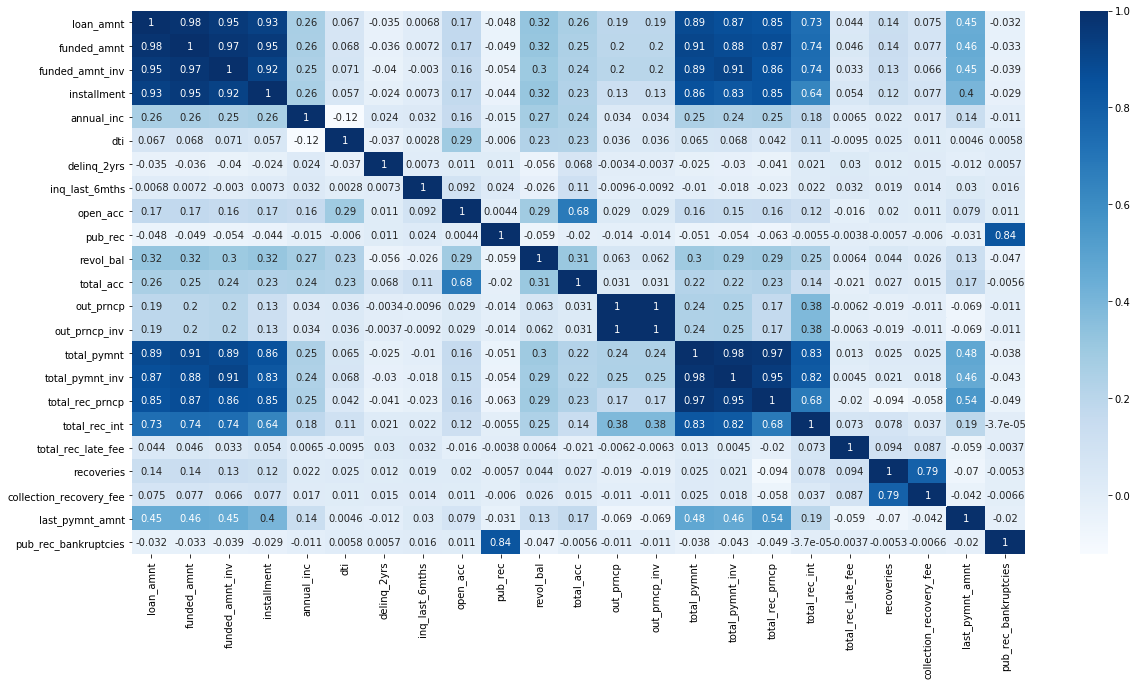

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

### Summary of Heat Map
    1. We see funded_amnt, loan_amnt, and funded_amnt_inv has high correlation
    2. total_pymnt, total_pymnt_inv and total_rec_prncp has high correlation
    3. Dropping extra columns with high correlation

In [24]:
df.drop(columns=['loan_amnt','funded_amnt_inv','total_pymnt_inv','total_rec_prncp'],inplace=True)

In [25]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [26]:
# For the target variables as we are interested in 
#Ranking loan status to numerical values, giving higher ranks to defaulters
df['loan_status']=df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else (2 if x=='Current' else 3))

In [27]:
df.drop(df[df['loan_status']==2].index,inplace=True)

In [28]:
##WE notice that out_prncp and out_prncp_inv becomes 0 (single value) now as it had values only for current loans
print(df['out_prncp'].unique())
print(df['out_prncp_inv'].unique())

[0.]
[0.]


In [29]:
df.drop(columns=['out_prncp','out_prncp_inv'],inplace=True)

In [30]:
df.shape

(35367, 33)

### Summary of column analysis
  1. Dropped null columns
  2. Dropped column with a single value
  3. Dropped the first 3 columns as they have 90%+ null values(next_pymnt_d,mths_since_last_record,mths_since_last_delinq)    
  4. Checked no of rows with null values 
  5. Dropped columns with unique identifiers(id, member id and url) and not useful for analysis 

### c) Column datatype analysis   
    

In [31]:
#Now lets check the data types of each column
df.dtypes

funded_amnt                  int64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                  int64
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
total_pymnt                float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_

In [32]:
#For the term variable we remove the months value
df.term=df.term.str.split(' ').apply(lambda x: x[1])

In [33]:
#For the int_rate variable we remove the % symbol at the end and convert it to double
df.int_rate=df.int_rate.str.replace(r'%', '').astype('double')

In [34]:
#Removing non integer value from emp_length
df['emp_length']=df['emp_length'].str.replace(r'\D+', '')

In [35]:
#converting emp_length to low, medium or high based on the no of years
df['emp_range']=df['emp_length'].apply(lambda x: 'High' if x in ['8','9','10'] else 
                                        ('Medium' if x in ['4','5','6','7'] else 'Low'))

In [36]:
#Converting issue_d to a datetime object
df['issue_d']=pd.to_datetime(df['issue_d'],format='%b-%y')

In [37]:
#Converting dates to full 4 digits to avoid ambiguity of taking it as 19XX or 20XX
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda x: x.split('-')[0] +'-'+'20'+x.split('-')[1]
                                                    if int(x.split('-')[1])>=0 
                                                    and int(x.split('-')[1])<=20 else
                                                    x.split('-')[0] +'-'+'19'+x.split('-')[1] )

In [38]:
#Converting earliest_cr_line to datetime object
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'],format='%b-%Y')

In [39]:
df['earliest_cr_line'].dtype

dtype('<M8[ns]')

In [40]:
years=df['earliest_cr_line'].dt.year.unique()
years.sort()
years


array([1946, 1950, 1954, 1956, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [41]:
#Removing % sign at the end
df['revol_util']=df.revol_util.str.replace(r'%', '').astype('double')

In [42]:
df['last_pymnt_d'].unique()

array(['Apr-13', 'Jan-15', 'May-16', 'Nov-12', 'Jun-13', 'Sep-13',
       'Jul-12', 'Oct-13', 'May-13', 'Feb-15', 'Aug-15', 'Oct-12',
       'Sep-12', 'Dec-12', 'Dec-14', 'Aug-13', 'Nov-13', 'Jan-14',
       'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12', 'Jul-14', 'Jul-13',
       'Jan-16', 'Apr-15', 'Feb-14', 'Sep-14', 'Jun-12', 'Feb-13',
       'Mar-13', 'May-14', 'Mar-15', 'Jan-13', 'Dec-13', 'Jun-14',
       'Feb-12', 'Mar-14', 'Apr-12', 'Sep-15', 'Nov-15', 'Mar-16',
       'Feb-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Apr-16', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 'Dec-

In [43]:
#converting last_pymnt_d to a datetime object
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

In [44]:
#converting last_credit_pull_d to a datetime object
df['last_credit_pull_d']=pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')

### Now we are done with formatting all columns to proper data type with no null values

In [45]:
#Checking the count of unique values in the data frame
df.nunique(axis=0).sort_values()

term                           2
loan_status                    2
emp_range                      3
pub_rec_bankruptcies           3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    10
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             509
zip_code                     805
funded_amnt                 1001
revol_util                  1081
total_rec_late_fee          1163
collection_recovery_fee     2386
dti                         2842
recoveries                  3585
annual_inc                  4831
installment                14028
revol_bal 

### Summary of Datatype Analysis
    1. Checked column data and changed to appropriate datatypes
    2. Created sub columns if needed for analysis

## 3. Univariate Analysis

In [46]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25 and feature!='loan_status' ]
discrete_feature.extend(['zip_code','addr_state'])
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete Variables : {}".format((discrete_feature)))

Discrete Variables Count: 13
Discrete Variables : ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'emp_range', 'zip_code', 'addr_state']


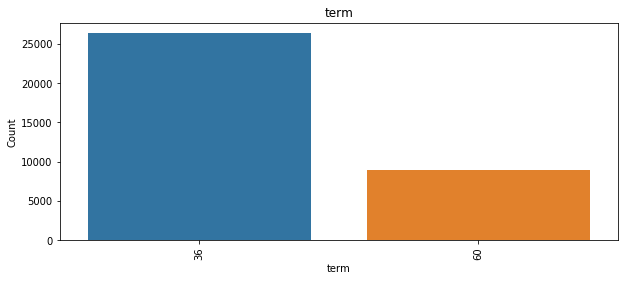

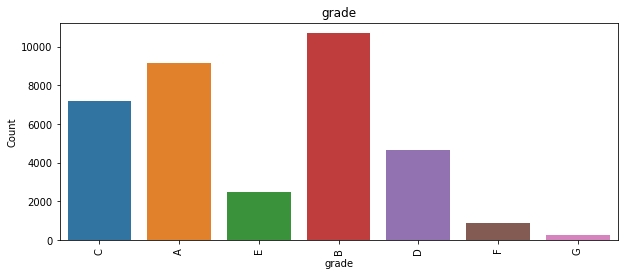

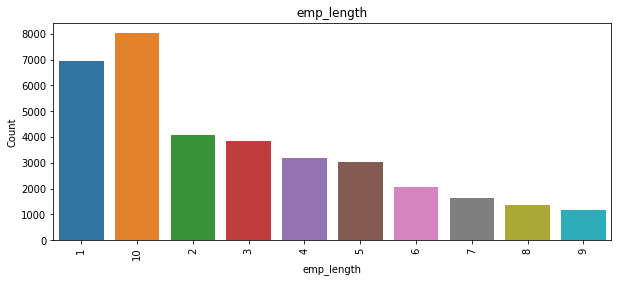

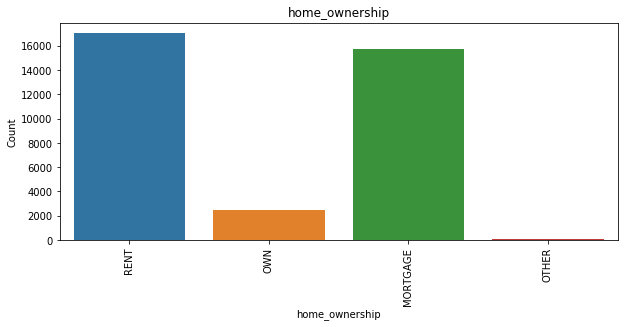

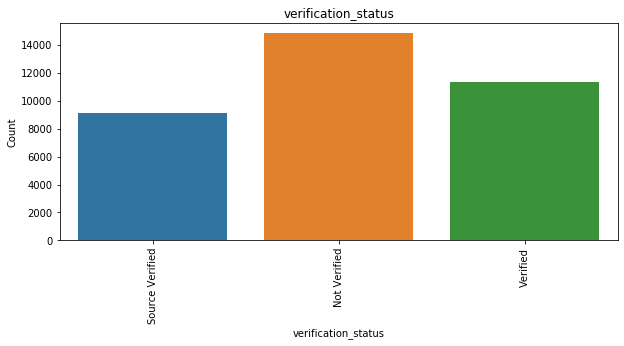

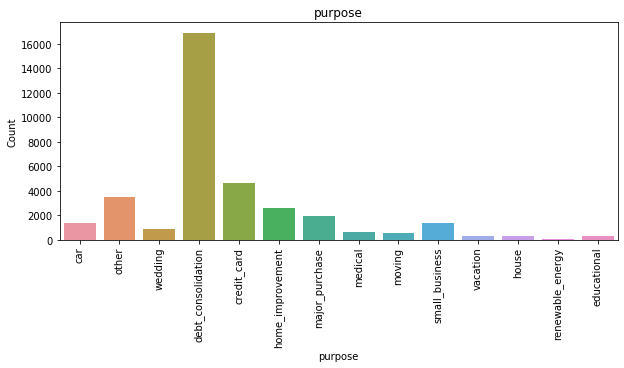

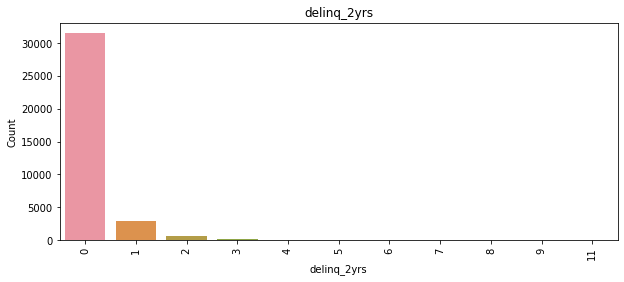

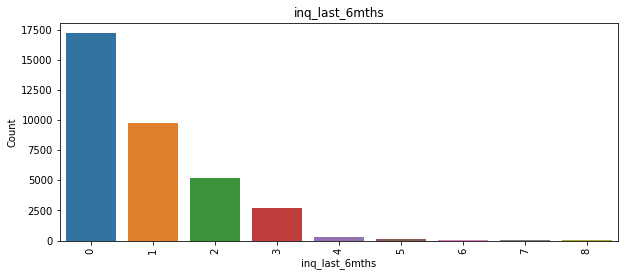

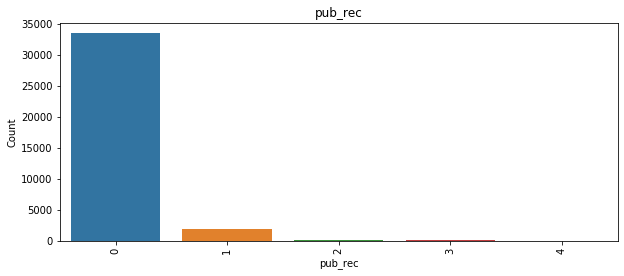

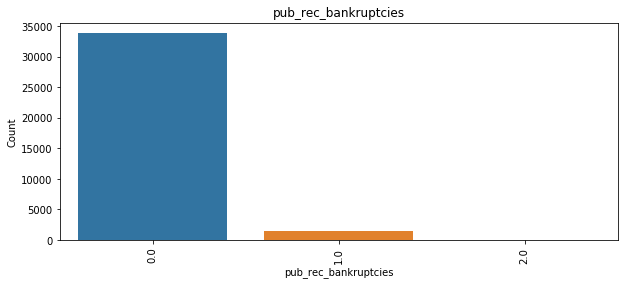

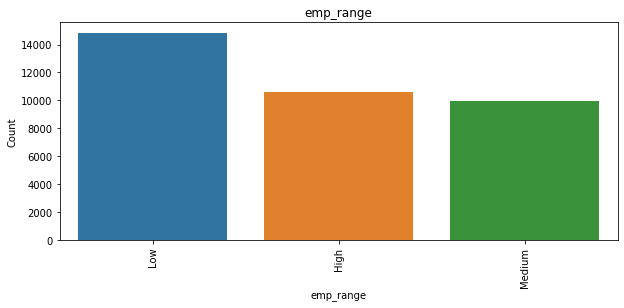

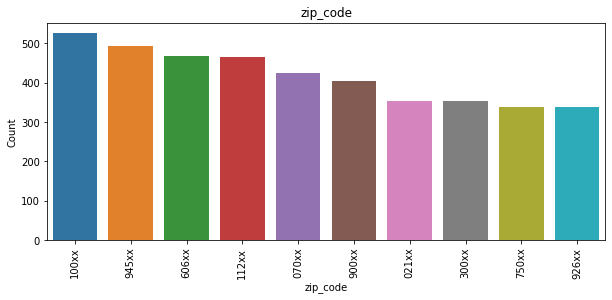

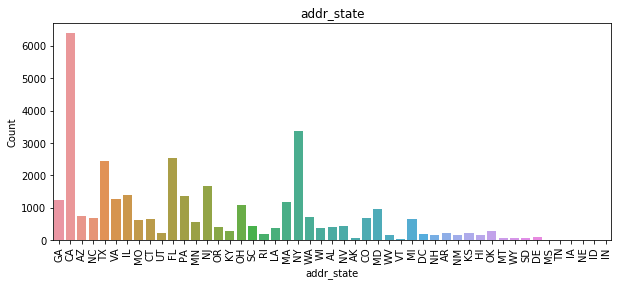

In [47]:
#Performing univariate analysis on discrete variables
for feature in discrete_feature:
    plt.figure(figsize=(10,4))
    data=df.copy()
    if feature=='zip_code':
        sns.countplot(x=feature,data=df,order=df.zip_code.value_counts().iloc[:10].index)
    else:
        sns.countplot(x=feature,data=df)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

### Summary of Univariate discrete variables
    1. 36 term was most alloted loans
    2. Grades B, C, A were the top alloted loan
    3. >=1, and 10+ emp lenth were the top alloted loan  
    4. Rent and Mortgage were the top alloted loan 
    5. Not Verified verification status was top alloted loan
    6. Debt Consolidation  was top alloted loan
    7. CA was top alloted loan

In [48]:
#Fetching features of type datetime
date_features=df.select_dtypes(include=['datetime64']).columns
print("DateTime Variables Count: {}".format(len(date_features)))
print("DateTime Variables : {}".format((date_features)))

DateTime Variables Count: 4
DateTime Variables : Index(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], dtype='object')


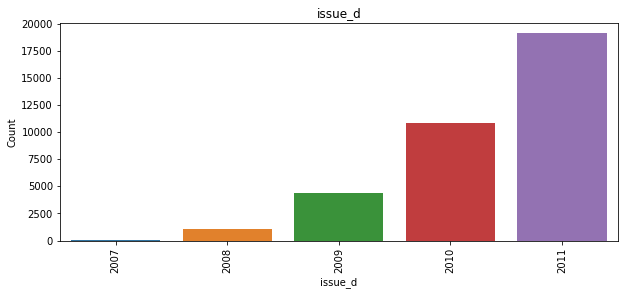

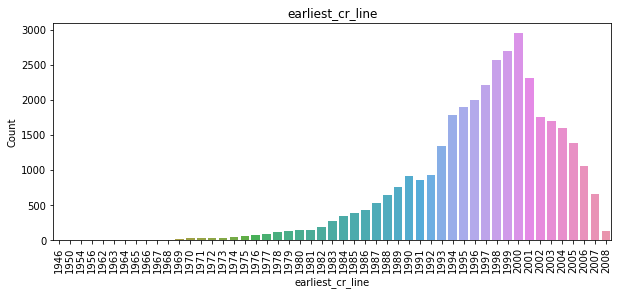

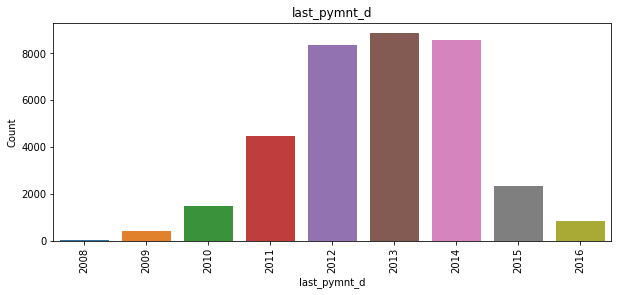

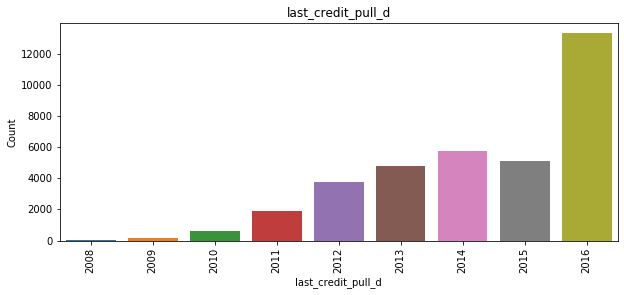

In [49]:
#Date fileds plot for univarient analysis
for feature in date_features:
    plt.figure(figsize=(10,4))
    data=df.copy()
    var=df[feature].dt.year
    sns.countplot(var)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

In [50]:
continuous_features=[feature for feature in df.columns if  (df[feature].dtype=='int64' or df[feature].dtype=='float64') and
                     feature not in discrete_feature and feature not in date_features]
print("Continuous Variables Count: {}".format(len(continuous_features)))
print("Continuous Variables : {}".format((continuous_features)))

Continuous Variables Count: 16
Continuous Variables : ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']


In [51]:
#removing object type variables from continuous features
df[continuous_features].dtypes

funded_amnt                  int64
int_rate                   float64
installment                float64
annual_inc                 float64
loan_status                  int64
dti                        float64
open_acc                     int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
total_pymnt                float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_fee    float64
last_pymnt_amnt            float64
dtype: object

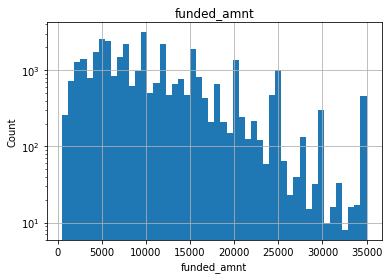

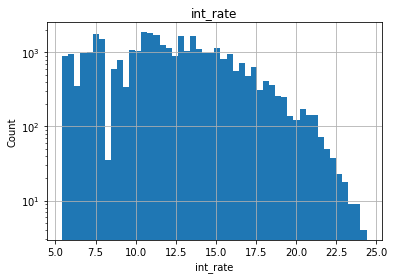

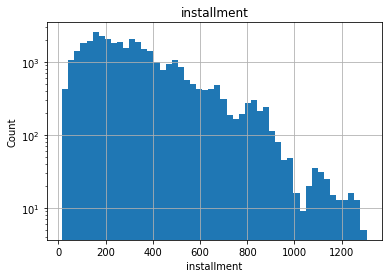

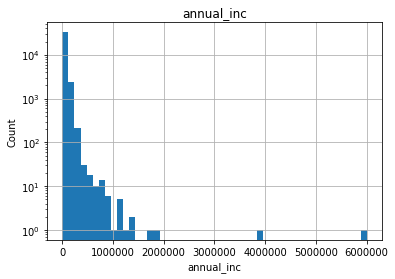

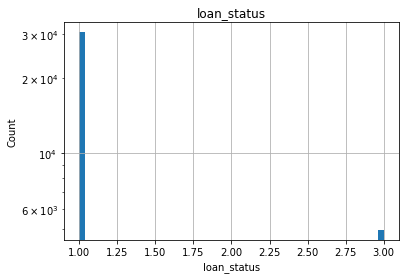

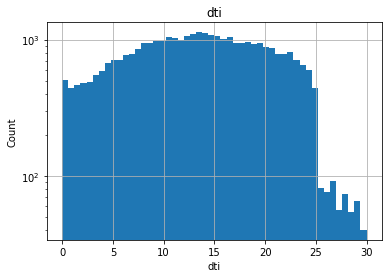

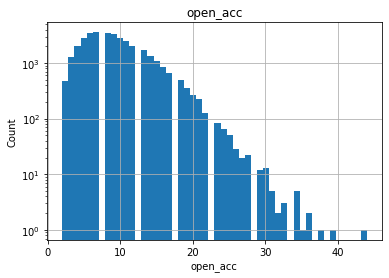

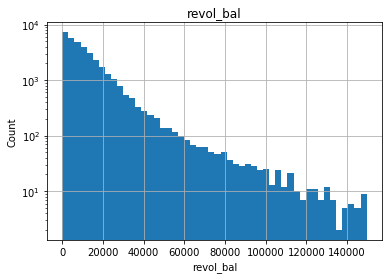

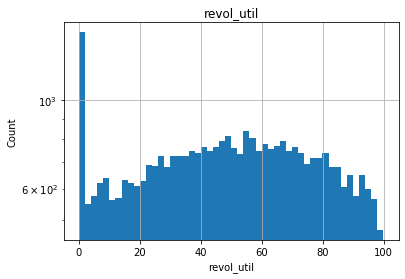

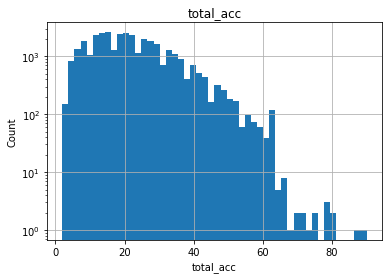

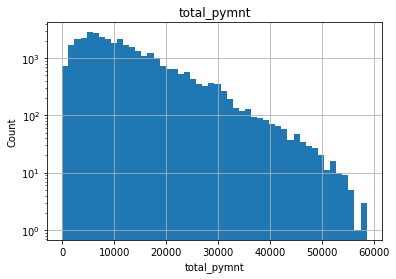

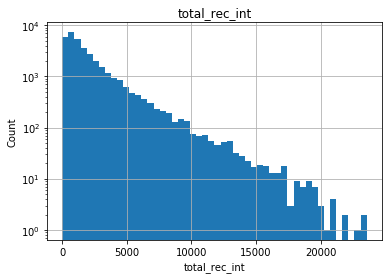

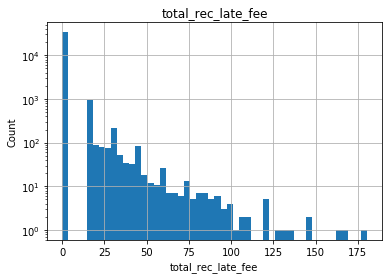

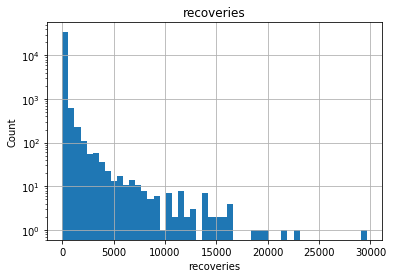

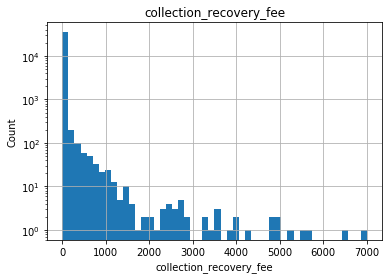

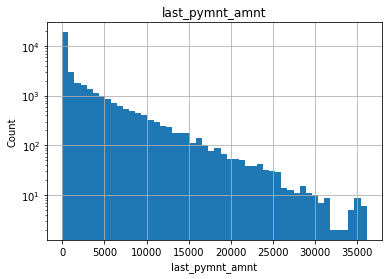

In [52]:
for feature in continuous_features:
    data=df.copy()
    data[feature].hist(log=True,bins=50)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

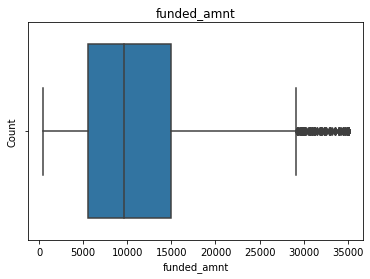

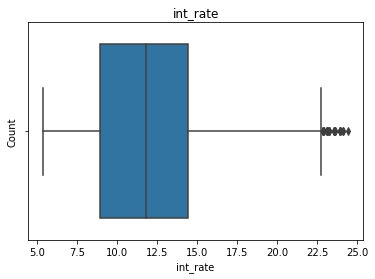

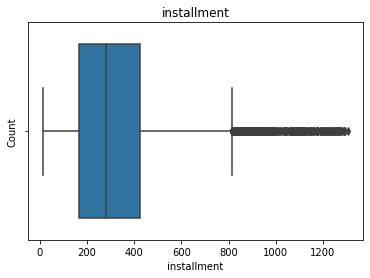

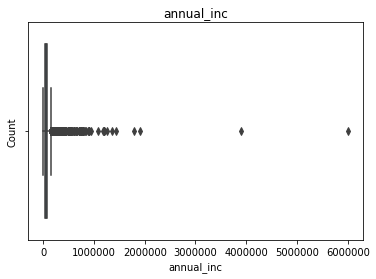

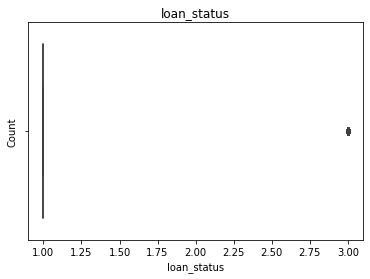

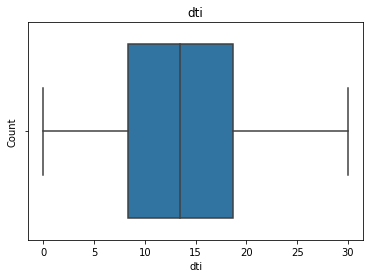

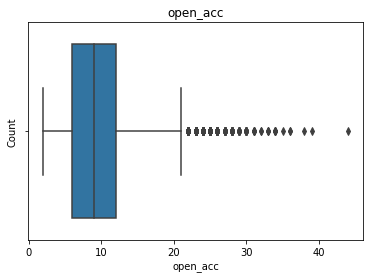

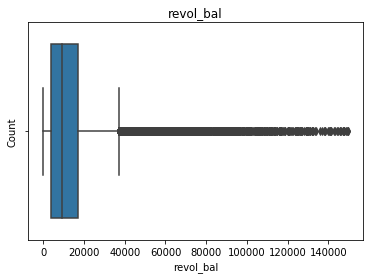

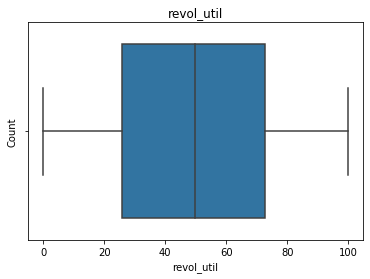

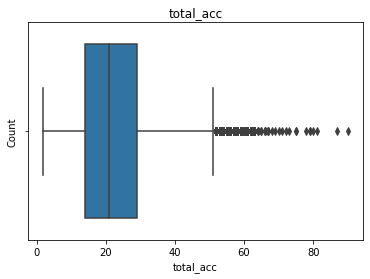

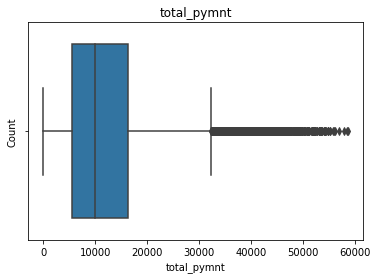

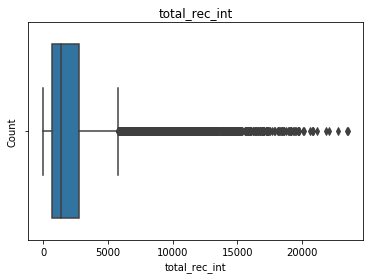

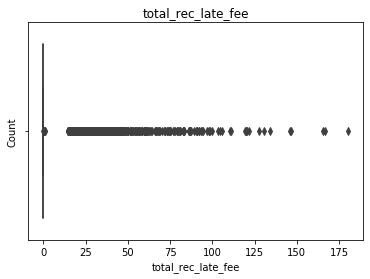

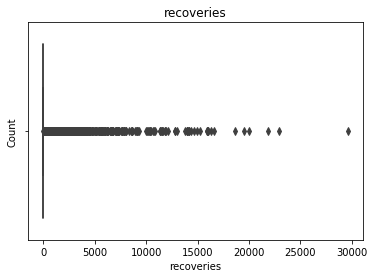

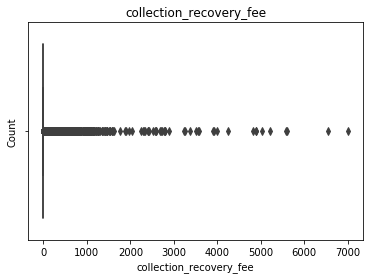

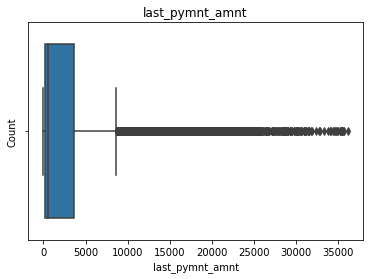

In [53]:
for feature in continuous_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [54]:
df[continuous_features].describe()

funded_amnt      int_rate   installment    annual_inc   loan_status  \
count  35367.000000  35367.000000  35367.000000  3.536700e+04  35367.000000   
mean   10866.525999     11.983468    324.043982  6.909599e+04      1.279526   
std     7069.586419      3.702512    207.149088  6.396705e+04      0.693492   
min      500.000000      5.420000     16.080000  4.000000e+03      1.000000   
25%     5500.000000      8.940000    167.840000  4.150000e+04      1.000000   
50%     9600.000000     11.830000    280.620000  6.000000e+04      1.000000   
75%    15000.000000     14.460000    426.640000  8.250000e+04      1.000000   
max    35000.000000     24.400000   1305.190000  6.000000e+06      3.000000   

                dti      open_acc      revol_bal    revol_util     total_acc  \
count  35367.000000  35367.000000   35367.000000  35367.000000  35367.000000   
mean      13.403961      9.332004   13367.676733     49.139015     22.209206   
std        6.636540      4.374975   15678.460397     28.228038     11.403045   
min        0.000000      2.000000       0.000000      0.000000      2.000000   
25%        8.320000      6.000000    3782.000000     25.900000     14.000000   
50%       13.500000      9.000000    8934.000000     49.700000     21.000000   
75%       18.640000     12.000000   17064.500000     72.600000     29.000000   
max       29.990000     44.000000  149588.000000     99.900000     90.000000   

        total_pymnt  total_rec_int  total_rec_late_fee    recoveries  \
count  35367.000000   35367.000000        35367.000000  35367.000000   
mean   12020.407377    2157.070677            1.306102     95.654256   
std     8817.192502    2410.568245            7.090080    692.056592   
min       33.730000       6.220000            0.000000      0.000000   
25%     5602.511430     662.235000            0.000000      0.000000   
50%     9865.711187    1331.960000            0.000000      0.000000   
75%    16300.486500    2722.910000            0.000000      0.000000   
max    58563.679930   23563.680000          180.200000  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  
count             35367.000000      35367.00000  
mean                 12.029025       2813.59290  
std                 142.972962       4521.49033  
min                   0.000000          0.01000  
25%                   0.000000        224.78500  
50%                   0.000000        602.58000  
75%                   0.000000       3604.44500  
max                7002.190000      36115.20000

In [55]:
df.dtypes

funded_amnt                         int64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                         int64
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                      int64
open_acc                            int64
pub_rec                             int64
revol_bal                           int64
revol_util                        float64
total_acc                         

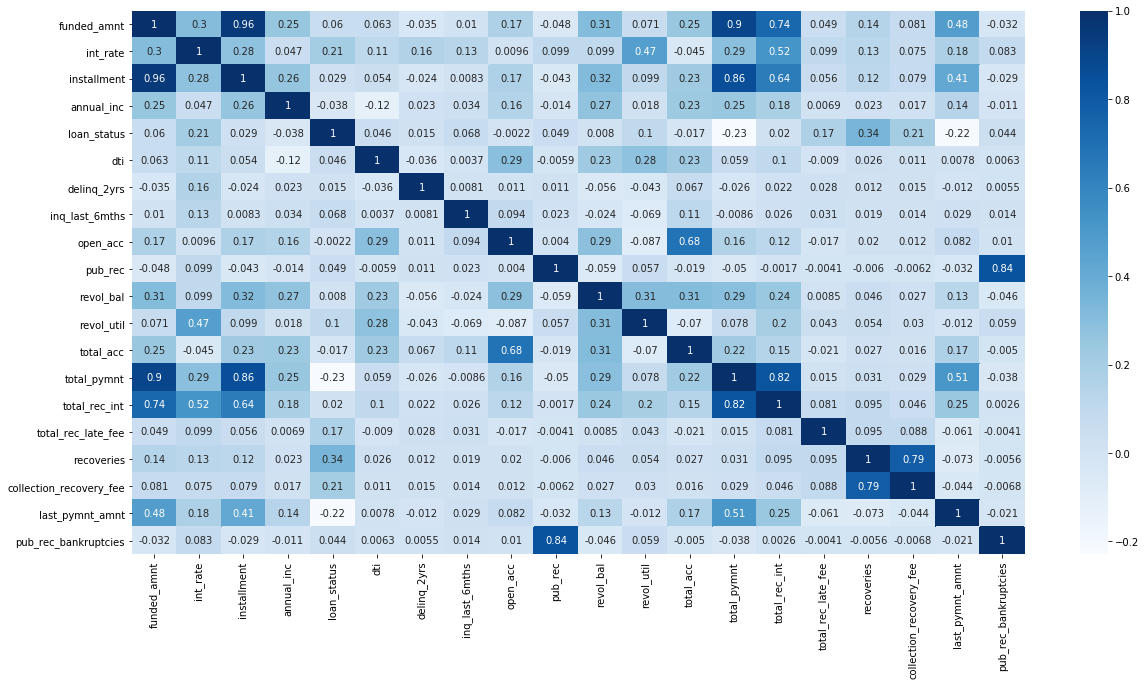

In [56]:
# Heap map after dropping most correlated columns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [57]:
#FInd the skewing of fields to see any outliers
df.skew()

funded_amnt                 1.095053
term                        1.129147
int_rate                    0.277187
installment                 1.139316
emp_length                  0.308970
annual_inc                 33.339078
loan_status                 2.077932
dti                        -0.041026
delinq_2yrs                 5.119633
inq_last_6mths              1.368633
open_acc                    0.974693
pub_rec                     4.624016
revol_bal                   3.157288
revol_util                 -0.043926
total_acc                   0.820298
total_pymnt                 1.348994
total_rec_int               2.658801
total_rec_late_fee          8.678046
recoveries                 16.525897
collection_recovery_fee    24.882213
last_pymnt_amnt             2.616225
pub_rec_bankruptcies        4.639340
dtype: float64

### As we dont see much skewness in data except annual income and collection recovery fees we are not doing outlier treatment

## Analysis with loan_status

In [58]:
#Checking correlation with loan status, higher the correlation higher chances of being a defaulter
df.corr()['loan_status'].sort_values()

total_pymnt               -0.228652
last_pymnt_amnt           -0.221307
annual_inc                -0.038290
total_acc                 -0.016935
open_acc                  -0.002164
revol_bal                  0.008032
delinq_2yrs                0.015336
total_rec_int              0.019935
installment                0.028807
pub_rec_bankruptcies       0.044314
dti                        0.045975
pub_rec                    0.048552
funded_amnt                0.060368
inq_last_6mths             0.067834
revol_util                 0.100220
total_rec_late_fee         0.167681
collection_recovery_fee    0.208735
int_rate                   0.211895
recoveries                 0.342911
loan_status                1.000000
Name: loan_status, dtype: float64

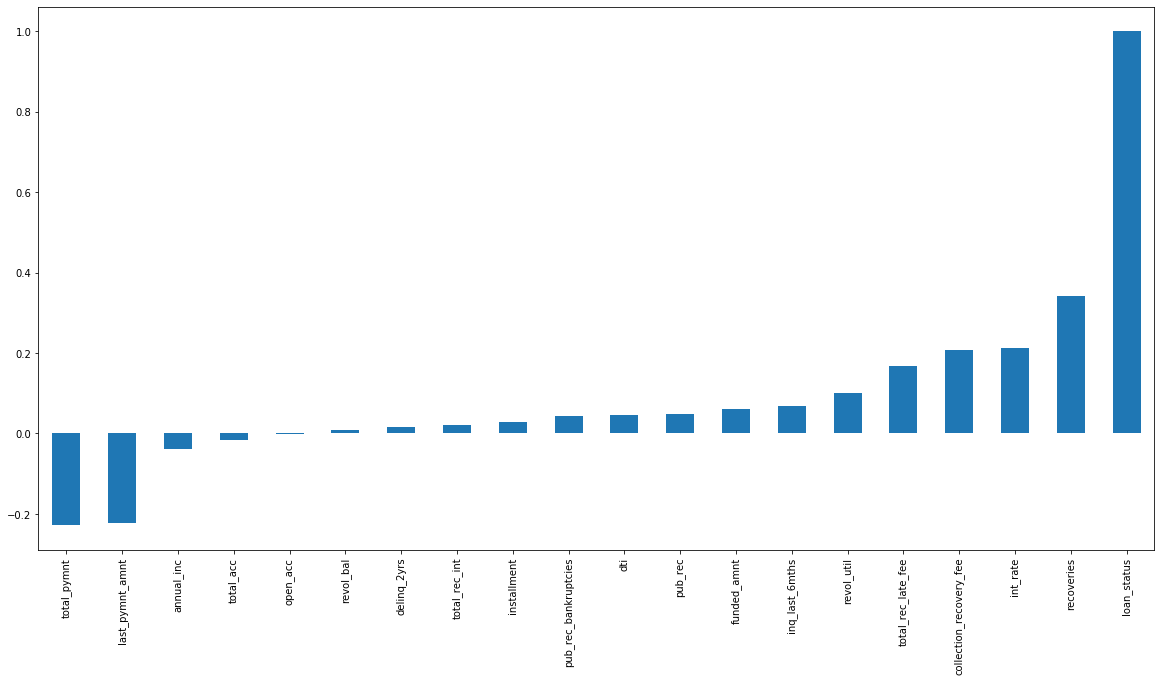

In [59]:
#Correlation plot between fields against Loan Status
plt.figure(figsize=(20,10))
df.corr()['loan_status'].sort_values().plot(kind='bar')
plt.show()

### Summary
    1.So we see that last_pymnt_amnt  and total_pymnt has a -ve correlation 
    2.collection_recovery_fee  ,int_rate and recoveries  have a +ve correlation to loan status

<Figure size 1440x720 with 0 Axes>

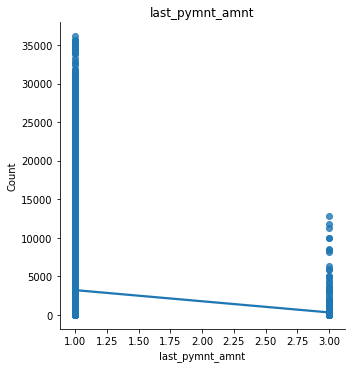

<Figure size 1440x720 with 0 Axes>

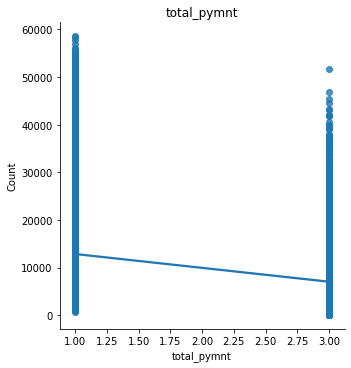

<Figure size 1440x720 with 0 Axes>

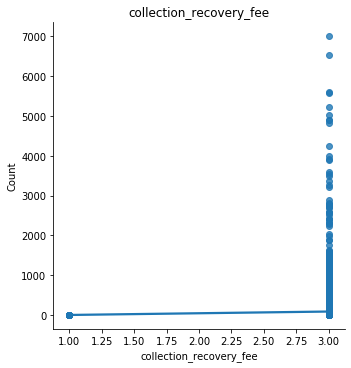

<Figure size 1440x720 with 0 Axes>

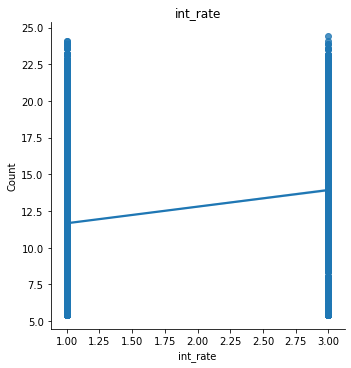

<Figure size 1440x720 with 0 Axes>

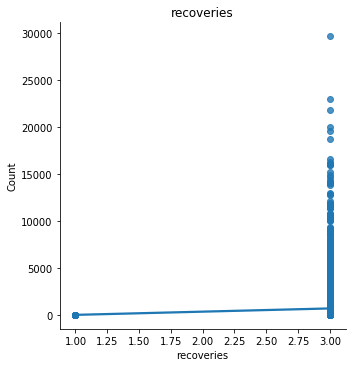

In [60]:
#Analysing the most correlated values with loan status
corr_feature=['last_pymnt_amnt','total_pymnt','collection_recovery_fee' ,'int_rate','recoveries' ]
for feature in corr_feature:
    plt.figure(figsize=(20,10))
    data=df.copy()
    sns.lmplot(x='loan_status',y=feature,data=df)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

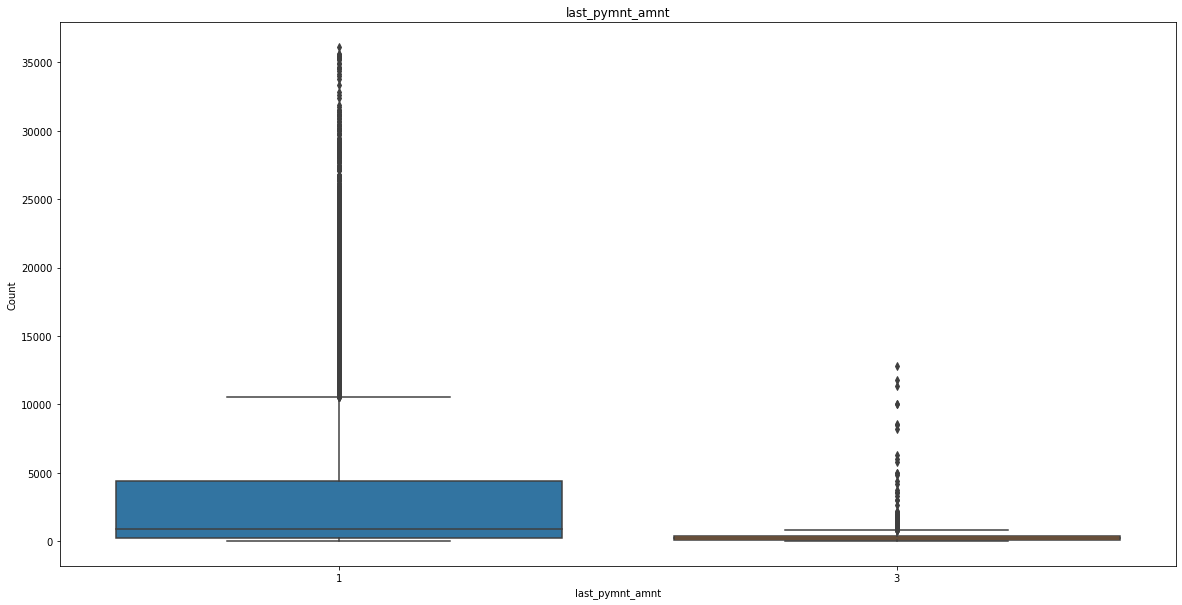

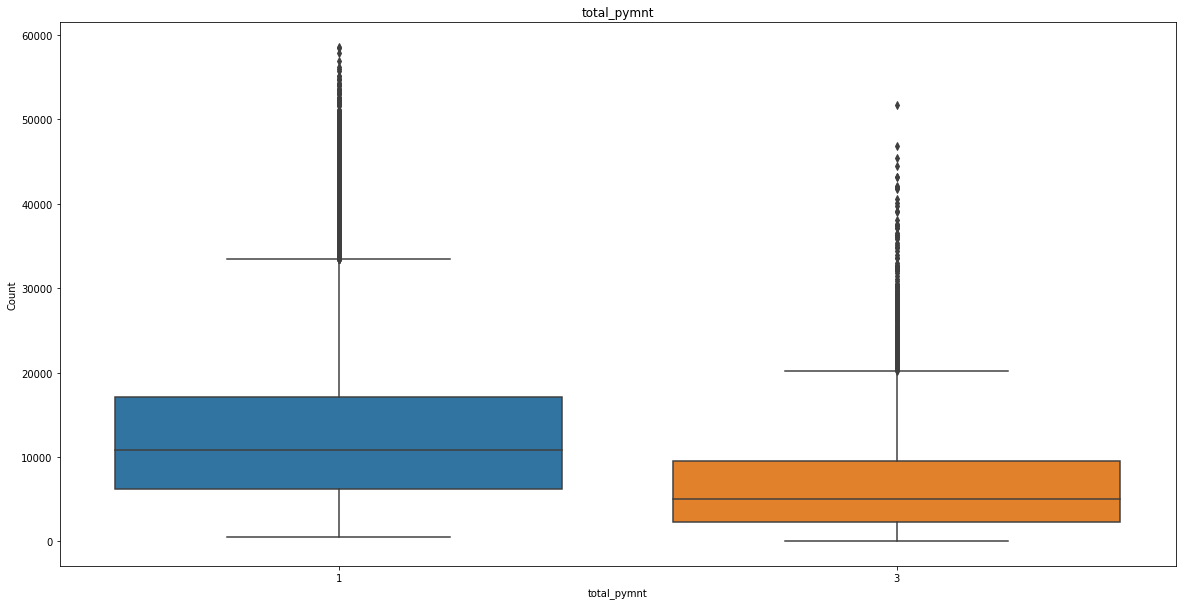

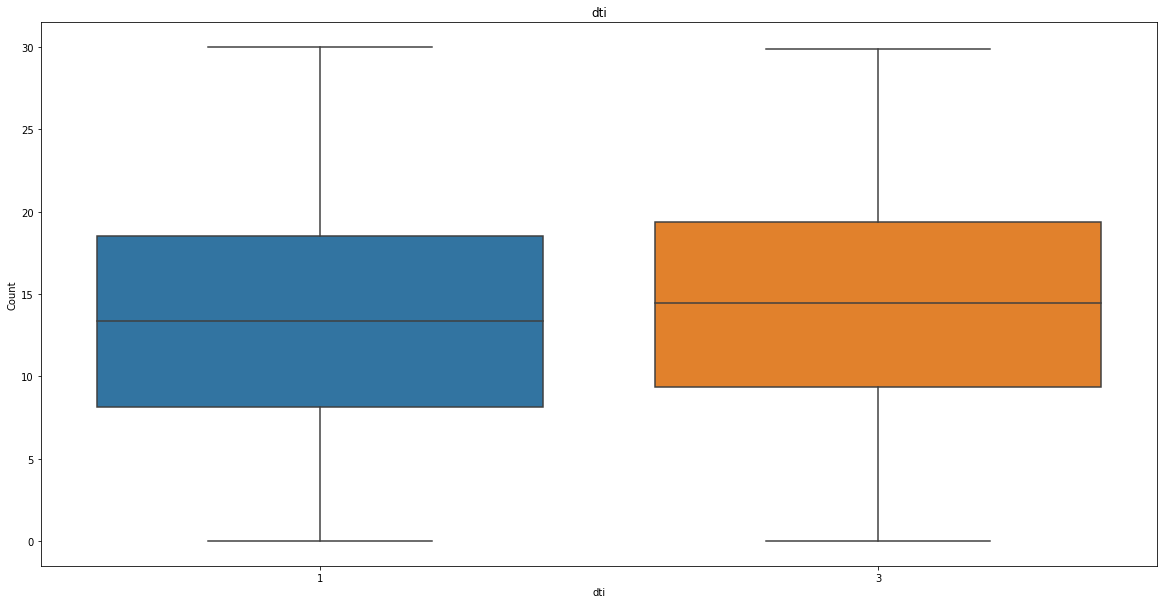

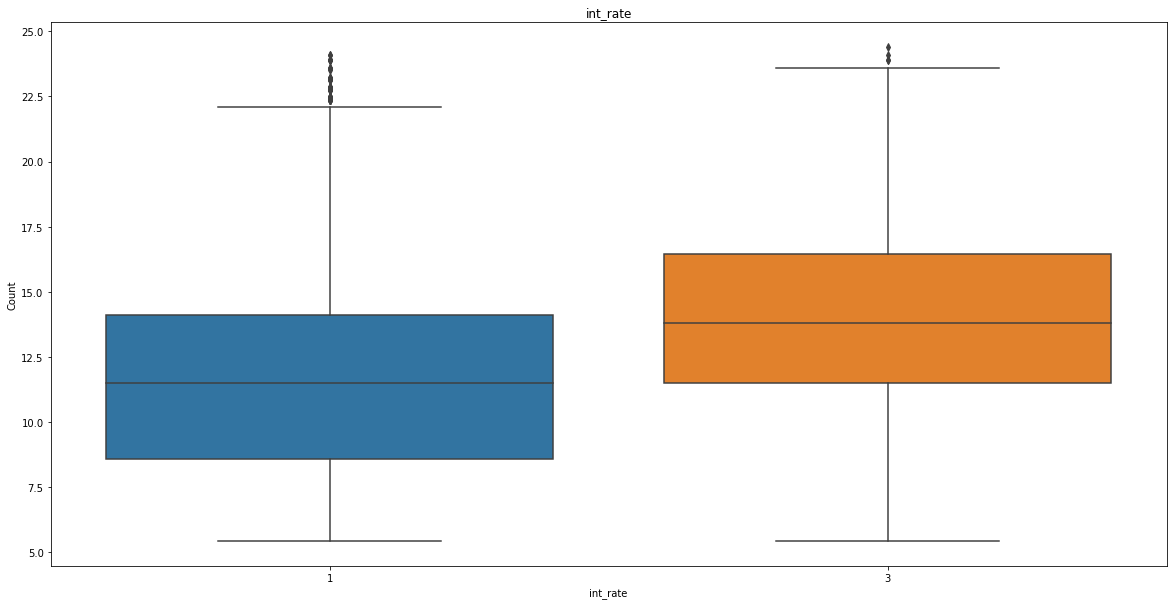

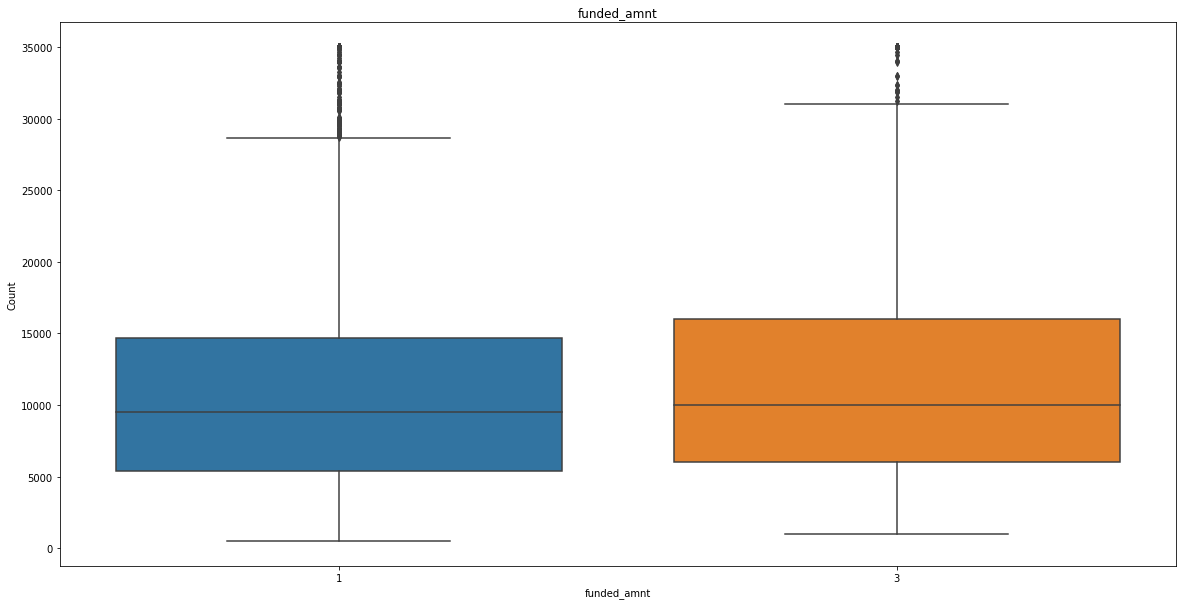

In [61]:
#Analysing the most correlated values with loan status
corr_feature=['last_pymnt_amnt','total_pymnt','dti' ,'int_rate','funded_amnt' ]
for feature in corr_feature:
    plt.figure(figsize=(20,10))
    data=df.copy()
    sns.boxplot(x='loan_status',y=feature,data=df)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [62]:
#Adding another column for counts
df['count']=1

### 4. Segmented Univariate Analysis

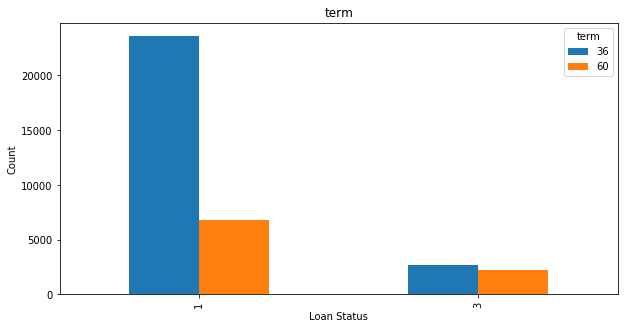

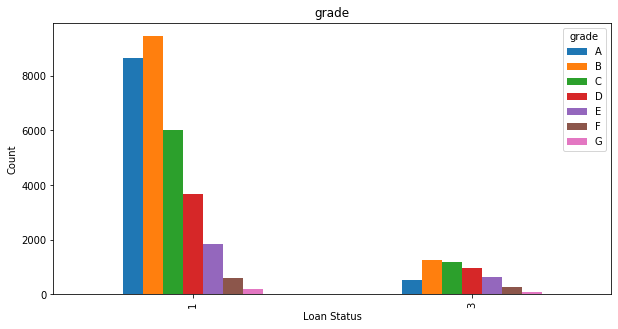

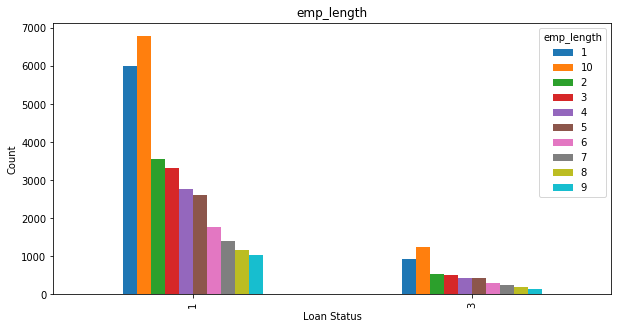

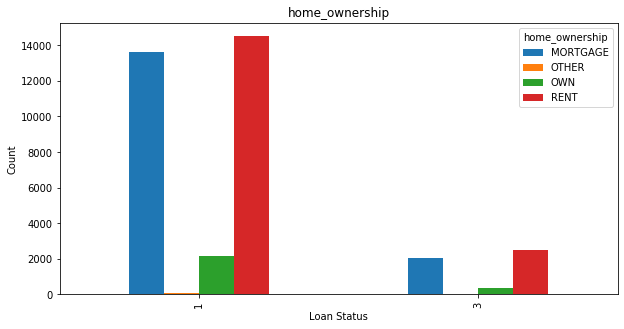

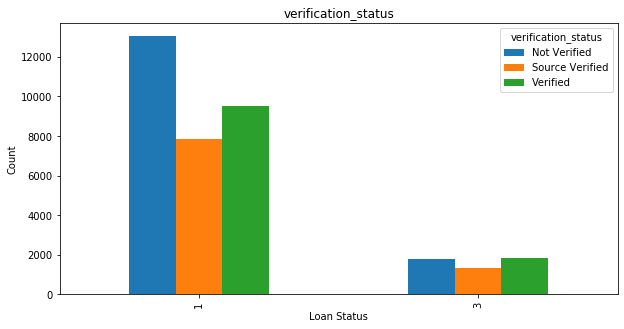

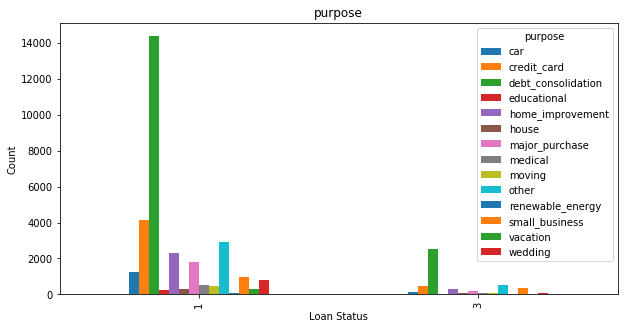

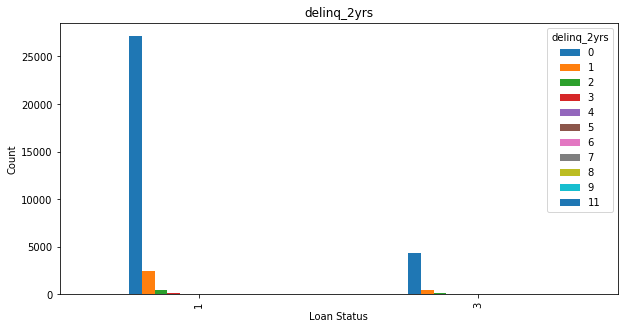

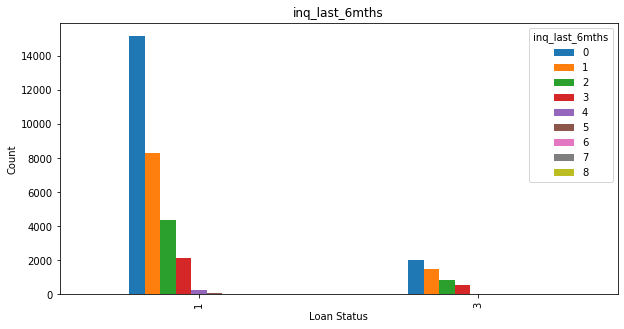

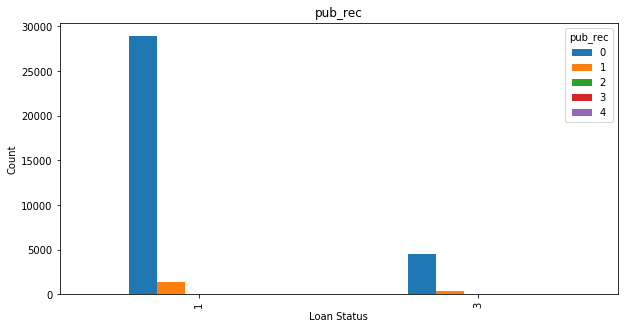

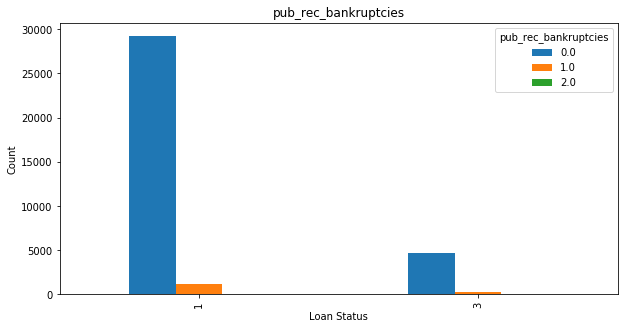

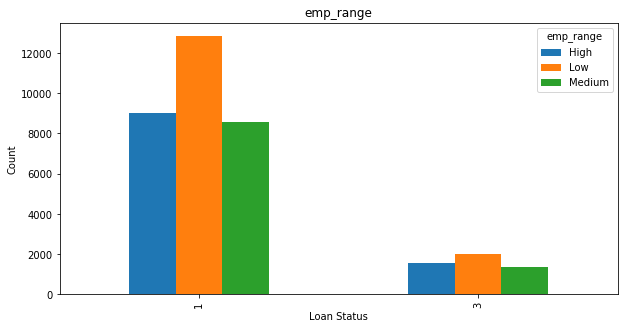

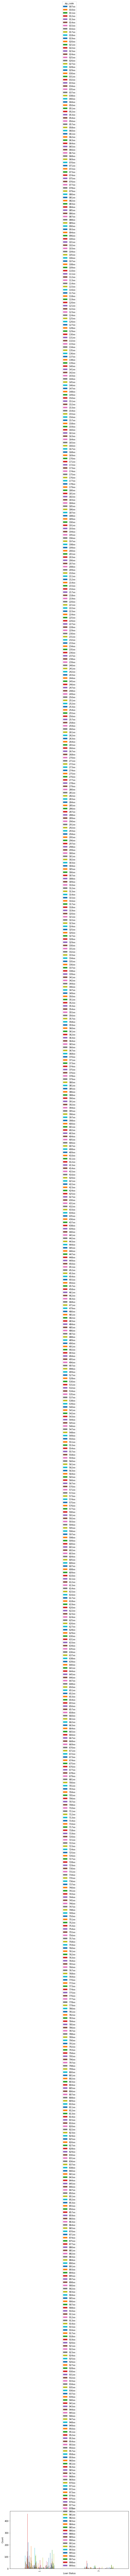

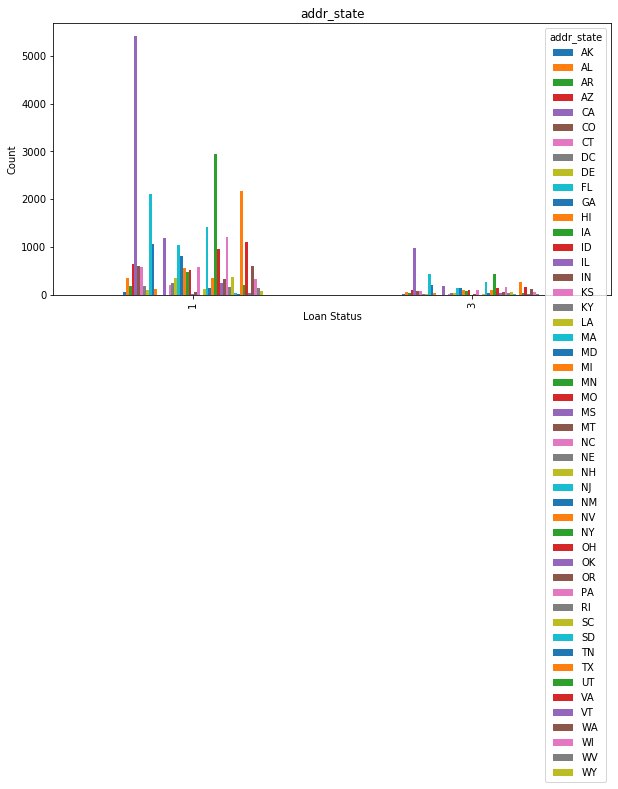

In [63]:
#Analysing discrete features with laon status
for feature in discrete_feature:
    data=df.copy()
    pvt=pd.pivot_table(data=df,columns=feature,index='loan_status',values='count',aggfunc=sum)
    pvt=pd.DataFrame(pvt)
    pvt.plot(kind='bar',figsize=(10,5))
    plt.xlabel('Loan Status')
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Summary of Segmented Univarient analysis for discrete features againt Loan Status
    1. 36 Term was top on defaulters list for Term
    2. Graded B, C, D were top on defaulters list for Grade
    3. >=1 and 10+ were the top on defaulters list for Emp length
    4. Rent and Mortigage were top defaulters list for Home Ownership
    5. Not Verififed were top defautlers list for Verification Status
    6. Debt Consolidation were top defaulters for purpose
    7. CA state was top defaulters for adress state 

<Figure size 720x288 with 0 Axes>

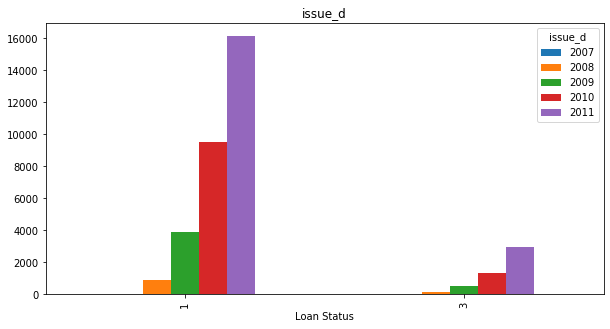

<Figure size 720x288 with 0 Axes>

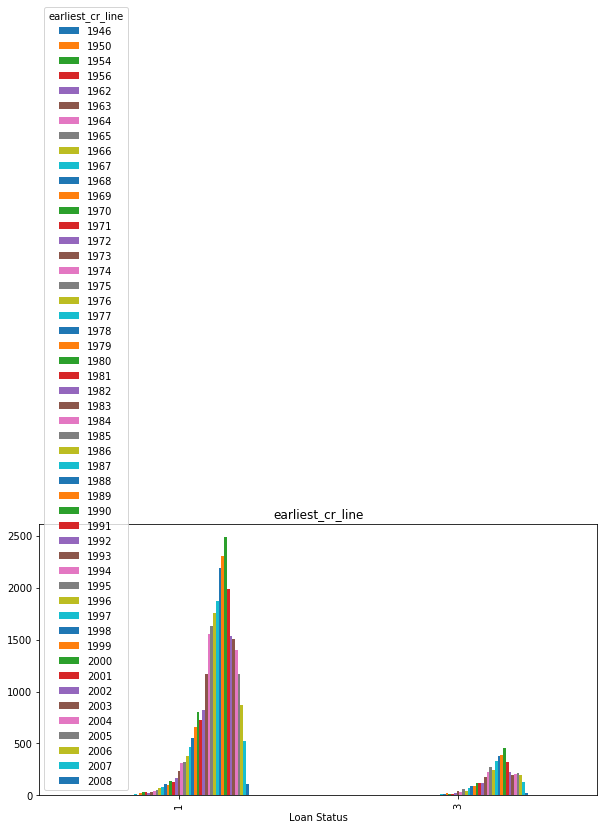

<Figure size 720x288 with 0 Axes>

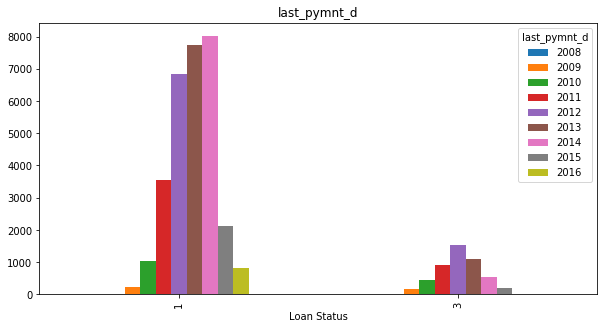

<Figure size 720x288 with 0 Axes>

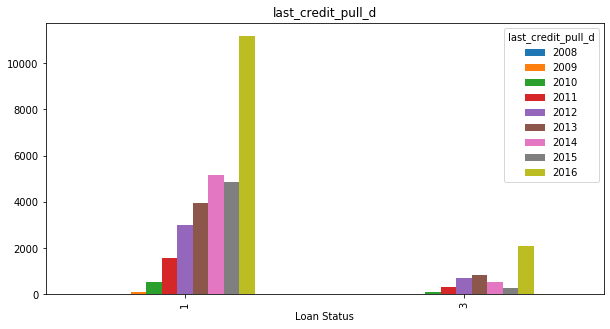

In [64]:
#Analysing year with the loan status
for feature in date_features:
    plt.figure(figsize=(10,4))
    data=df.copy()
    var=df[feature].dt.year
    pvt=pd.pivot_table(data=df,columns=var,index='loan_status',values='count',aggfunc=sum)
    pvt=pd.DataFrame(pvt)
    pvt.plot(kind='bar',figsize=(10,5))
    plt.xlabel('Loan Status')
    plt.xticks(rotation=90)
    plt.title(feature)
    plt.show()

In [65]:
for feature in continuous_features:
    print(feature,' ',100*sum(df[feature]>np.percentile(df[feature], 95))/len(df))
    #print('90th Percentile for {}  {} '.format(feature,np.percentile(df[feature], 90)))

funded_amnt   3.3251335991178217
int_rate   4.750190855882602
installment   4.993355387790879
annual_inc   4.843498176266011
loan_status   0.0
dti   4.987700398676733
open_acc   3.641812989509995
revol_bal   5.001837871462097
revol_util   4.917013034749908
total_acc   4.430683970933356
total_pymnt   5.001837871462097
total_rec_int   5.001837871462097
total_rec_late_fee   5.001837871462097
recoveries   5.001837871462097
collection_recovery_fee   4.996182882347951
last_pymnt_amnt   5.001837871462097


In [66]:
df.describe()

funded_amnt      int_rate   installment    annual_inc   loan_status  \
count  35367.000000  35367.000000  35367.000000  3.536700e+04  35367.000000   
mean   10866.525999     11.983468    324.043982  6.909599e+04      1.279526   
std     7069.586419      3.702512    207.149088  6.396705e+04      0.693492   
min      500.000000      5.420000     16.080000  4.000000e+03      1.000000   
25%     5500.000000      8.940000    167.840000  4.150000e+04      1.000000   
50%     9600.000000     11.830000    280.620000  6.000000e+04      1.000000   
75%    15000.000000     14.460000    426.640000  8.250000e+04      1.000000   
max    35000.000000     24.400000   1305.190000  6.000000e+06      3.000000   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  35367.000000  35367.000000    35367.000000  35367.000000  35367.000000   
mean      13.403961      0.146323        0.866995      9.332004      0.054147   
std        6.636540      0.493060        1.064434      4.374975      0.235734   
min        0.000000      0.000000        0.000000      2.000000      0.000000   
25%        8.320000      0.000000        0.000000      6.000000      0.000000   
50%       13.500000      0.000000        1.000000      9.000000      0.000000   
75%       18.640000      0.000000        1.000000     12.000000      0.000000   
max       29.990000     11.000000        8.000000     44.000000      4.000000   

       ...    revol_util     total_acc   total_pymnt  total_rec_int  \
count  ...  35367.000000  35367.000000  35367.000000   35367.000000   
mean   ...     49.139015     22.209206  12020.407377    2157.070677   
std    ...     28.228038     11.403045   8817.192502    2410.568245   
min    ...      0.000000      2.000000     33.730000       6.220000   
25%    ...     25.900000     14.000000   5602.511430     662.235000   
50%    ...     49.700000     21.000000   9865.711187    1331.960000   
75%    ...     72.600000     29.000000  16300.486500    2722.910000   
max    ...     99.900000     90.000000  58563.679930   23563.680000   

       total_rec_late_fee    recoveries  collection_recovery_fee  \
count        35367.000000  35367.000000             35367.000000   
mean             1.306102     95.654256                12.029025   
std              7.090080    692.056592               142.972962   
min              0.000000      0.000000                 0.000000   
25%              0.000000      0.000000                 0.000000   
50%              0.000000      0.000000                 0.000000   
75%              0.000000      0.000000                 0.000000   
max            180.200000  29623.350000              7002.190000   

       last_pymnt_amnt  pub_rec_bankruptcies    count  
count      35367.00000          35367.000000  35367.0  
mean        2813.59290              0.041677      1.0  
std         4521.49033              0.200560      0.0  
min            0.01000              0.000000      1.0  
25%          224.78500              0.000000      1.0  
50%          602.58000              0.000000      1.0  
75%         3604.44500              0.000000      1.0  
max        36115.20000              2.000000      1.0  

[8 rows x 21 columns]

### Summary of Segmented Univarient for continuous features
    1. Top defaulted loan issued year was 2011
    2. Top defaultedlast payment date is 2012

## 5. Bivariate Analysis

In [67]:
#Dropping all rows with current loan status and keep defaulters data
df_default=df.drop(df[df['loan_status']==1].index)

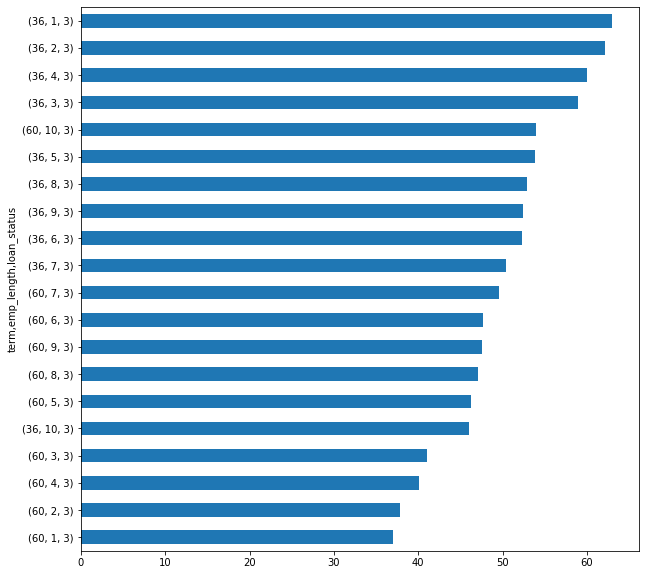

In [68]:
#Plot Term vs Emp Length vs Loan Status
plt.figure(figsize=(10,10))
(df_default.groupby(['term','emp_length','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().plot.barh()
plt.show()

In [69]:
#Observation: With 36 term with exp <4 years and 60 term with >10 years exp more likely to default

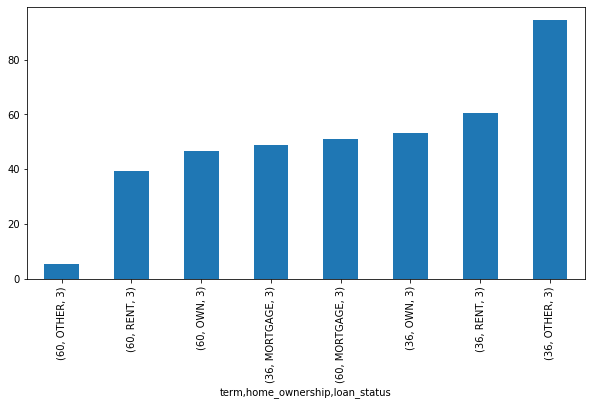

In [70]:
#Plot for Term vs Home Ownership vs Loan Status
plt.figure(figsize=(10,5))
(df_default.groupby(['term','home_ownership','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().plot.bar()
plt.show()

In [71]:
#Observation: Term 36 and Other is more likely to default

In [72]:
#Adding annual income categorization column for better plotting
#Less than 40K$ as low Income, 40K-80K$ as Medium Income and more than 80K$ as High income  
df_default['annual_inc_cat']=df_default['annual_inc'].apply(lambda x: 'Low' if x<40000 else ('Medium' if x<80000 else 'High'))

In [73]:
df_default['annual_inc_cat'].value_counts()

Medium    2532
Low       1327
High      1084
Name: annual_inc_cat, dtype: int64

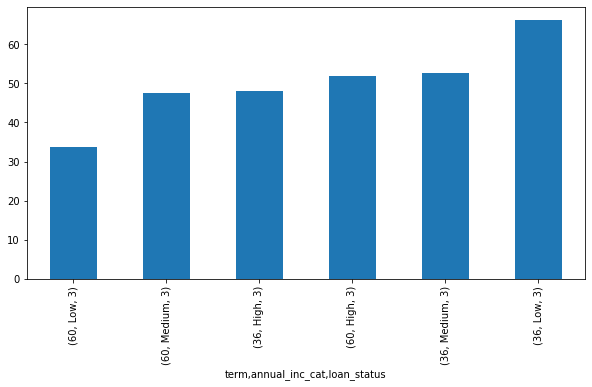

In [74]:
#plotting for Term vs Annual Inc Category vs Loan status
plt.figure(figsize=(10,5))
(df_default.groupby(['term','annual_inc_cat','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().plot.bar()
plt.show()

In [75]:
#Observation: 36 and Low income more likely to default

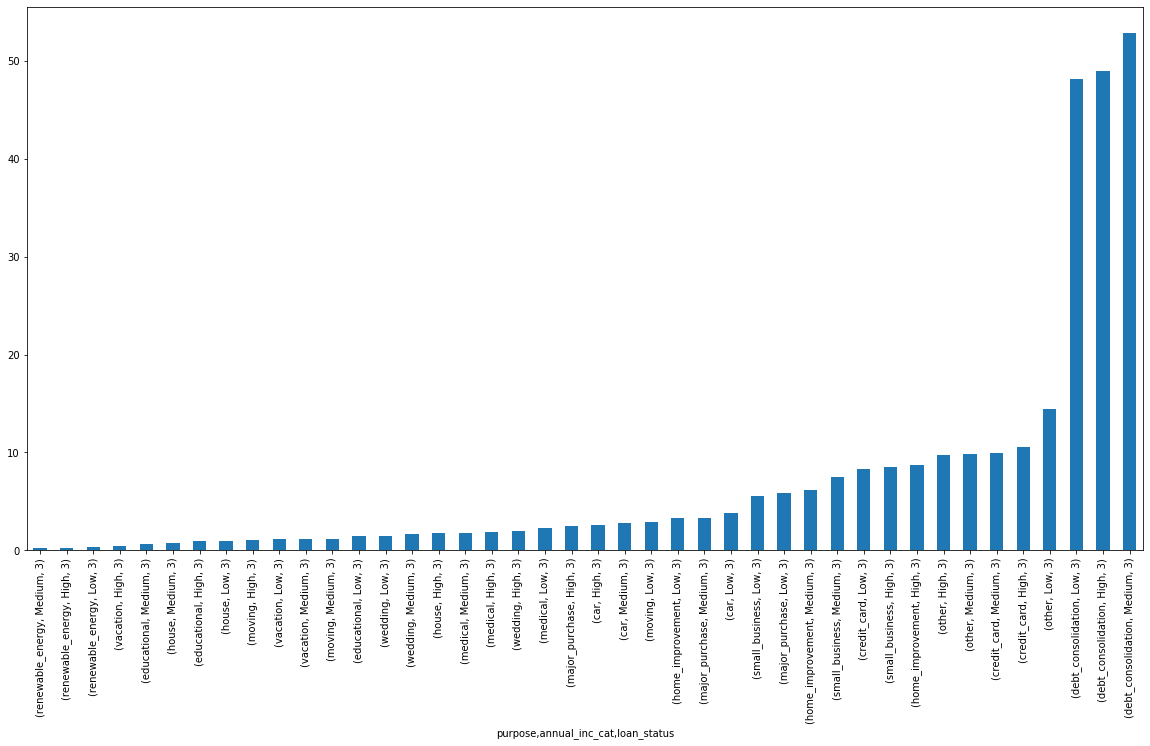

In [76]:
# Plot for Purpose vs Annual Inc Category Vs Loan Status
plt.figure(figsize=(20,10))
(df_default.groupby(['purpose','annual_inc_cat','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().plot.bar()
plt.show()

In [77]:
# Observation:  With any range of income debt_consolidation purpose category as the top defaulter

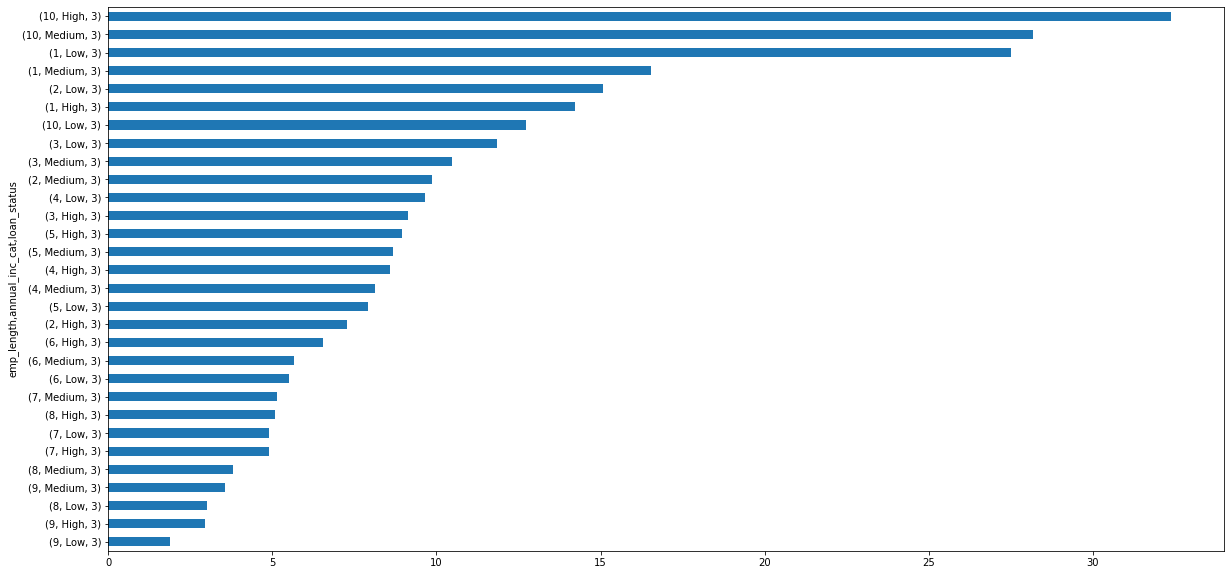

In [78]:
#Plot for Emp Length vs Annual Inc Category vs Loan Status
plt.figure(figsize=(20,10))
(df_default.groupby(['emp_length','annual_inc_cat','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().plot.barh()
plt.show()

In [79]:
#Observation: With High or Medium income >10years exp  or Low income with <=1 year exp with medium 1 year exp is likely to default

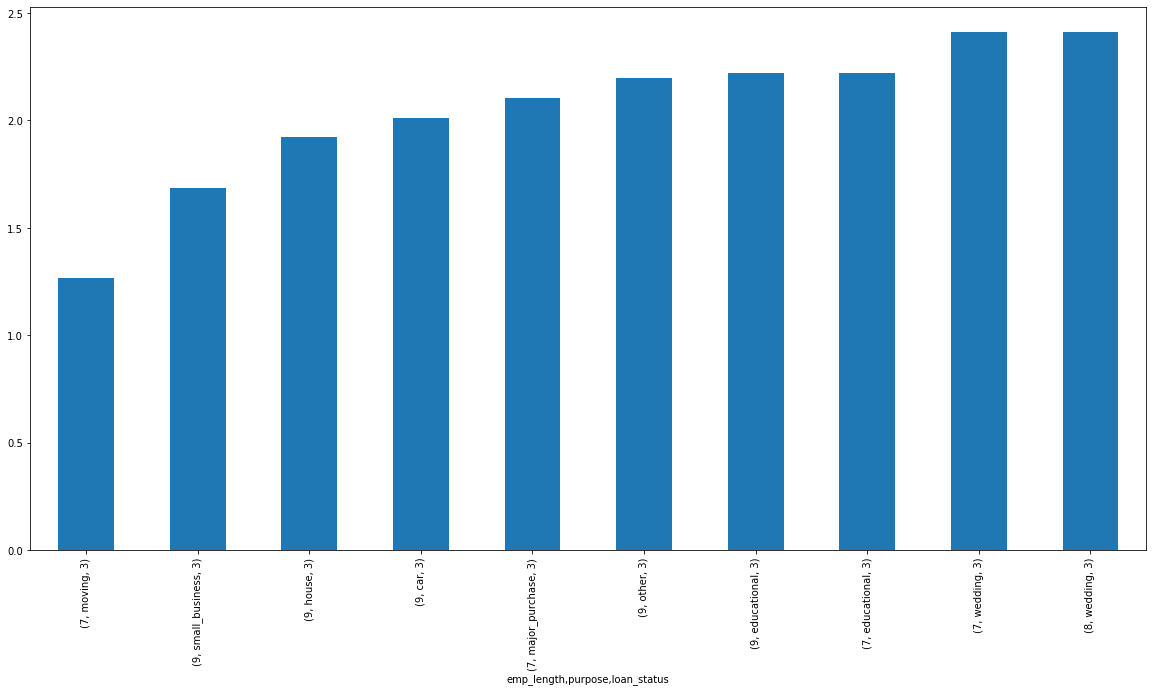

In [80]:
#Plot for Emp Length vs Purpose Vs Loan Status
plt.figure(figsize=(20,10))
(df_default.groupby(['emp_length','purpose','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [81]:
#Observation: With experience >7 years, and loan purpose like educational or wedding are likely to default

In [82]:
(df['dti']).describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [83]:
#Adding annual income categorization column for better plotting
#Less than 10% as low, 10-0 as Medium  and more than 20 as High  
df_default['dti_range']=df_default['dti'].apply(lambda x: 'Low' if x<=10 else ('Medium' if x<=20 else 'High'))

In [84]:
df_default['dti_range'].value_counts()

Medium    2495
Low       1367
High      1081
Name: dti_range, dtype: int64

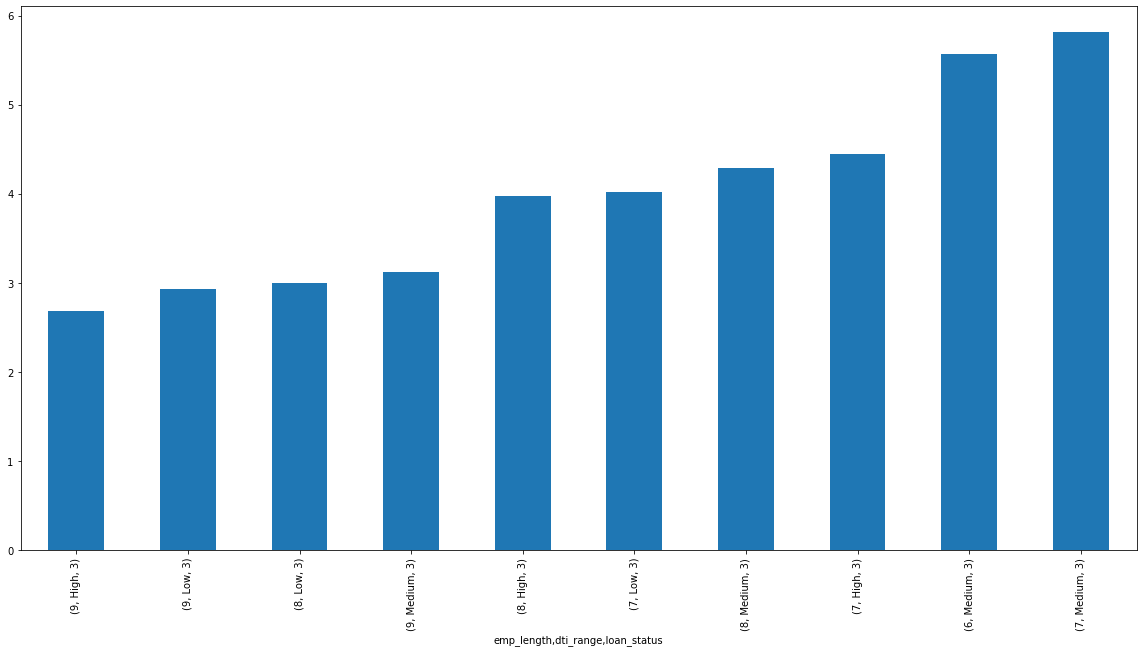

In [85]:
#Plot Emp Length vs dti vs Loan status
plt.figure(figsize=(20,10))
(df_default.groupby(['emp_length','dti_range','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [86]:
#Observations: For medium DTI, with experience in range 6 to 8 years likely to default
# For High  DTI, with 7 years of experience is likely to default

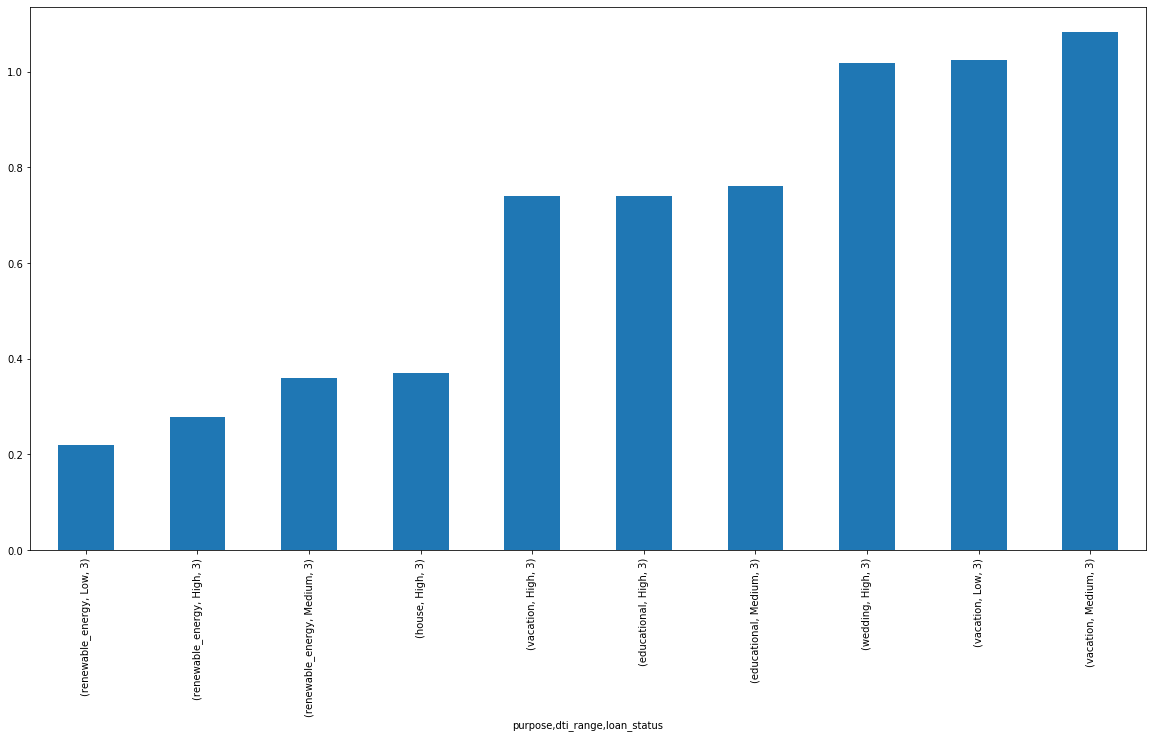

In [87]:
#Plot for Purpose vs dti vs Loan Status
plt.figure(figsize=(20,10))
(df_default.groupby(['purpose','dti_range','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [88]:
#Observation: Educational, vacation and wedding seems to default more across the DTI

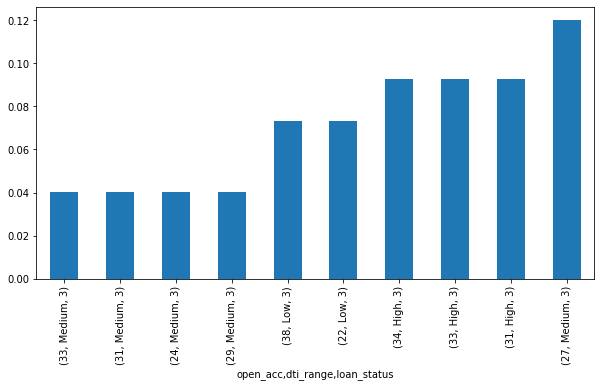

In [89]:
#Plot Open Acc vs dti vs loan status
plt.figure(figsize=(10,5))
(df_default.groupby(['open_acc','dti_range','loan_status'])['loan_status'].count().groupby(level=1).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [90]:
#Observation: With High DTI and open accounts in range 31 to 34, and Medium with 27 open accounts they are more likely to default

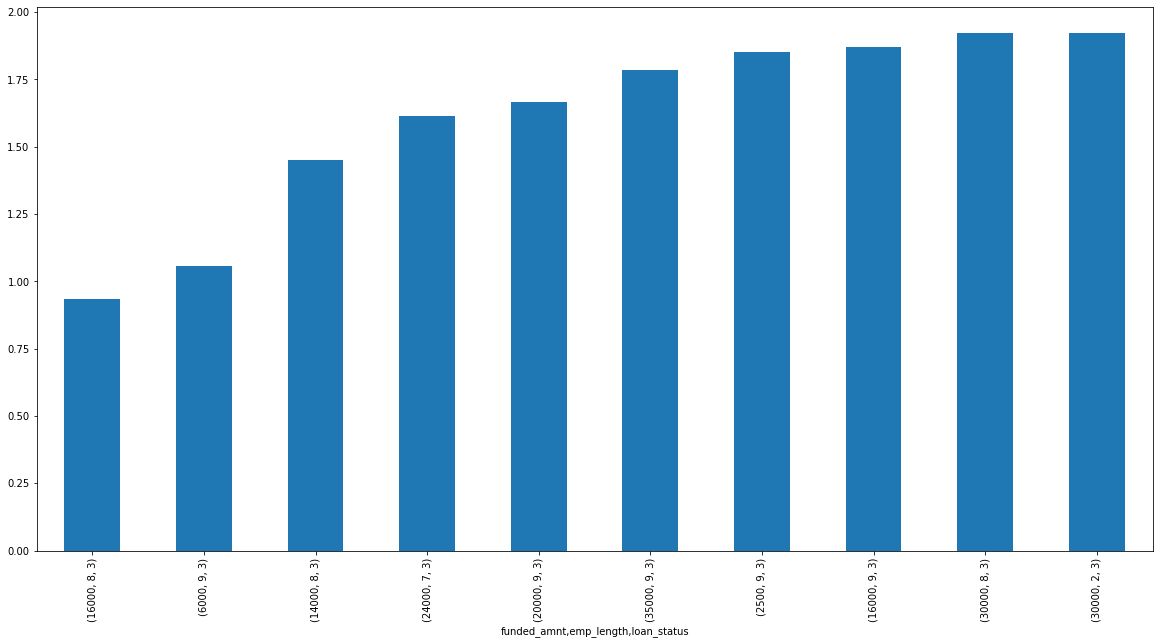

In [91]:
#Plot Funded Amount vs emp length, loan status
plt.figure(figsize=(20,10))
(df_default.groupby(['funded_amnt','emp_length','loan_status'])['loan_status'].count().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [92]:
df_default['funded_amnt'].describe()

count     4943.000000
mean     11925.318632
std       7734.585755
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

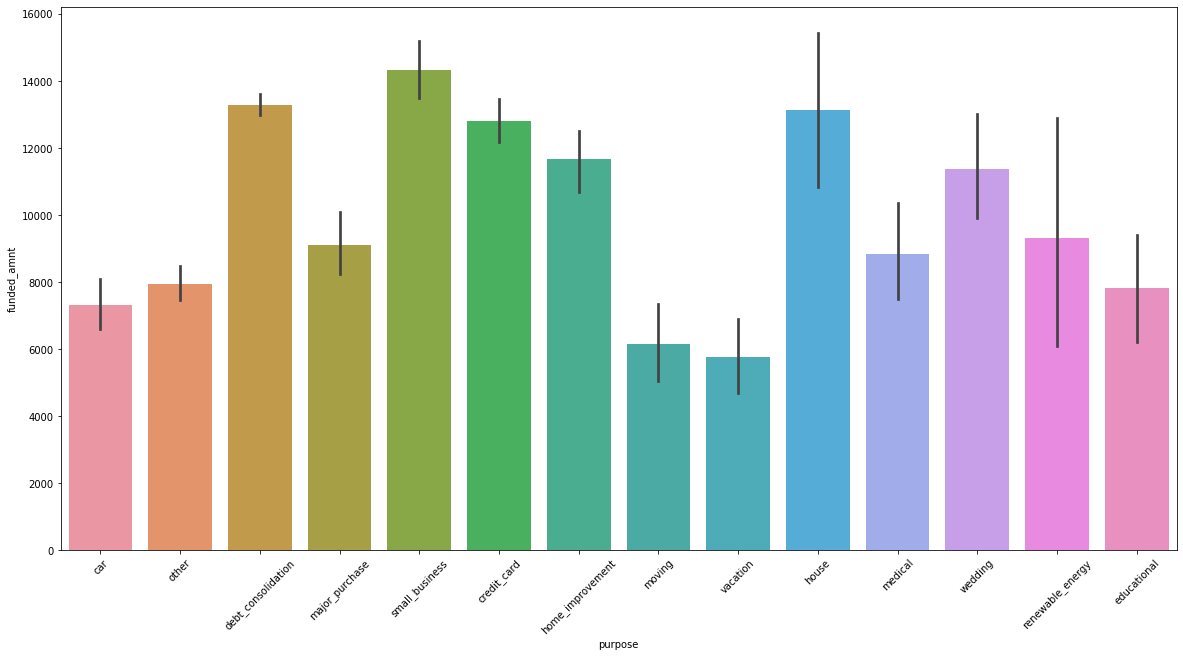

In [93]:
#Plot for Purpose vs Funded Amount 
plt.figure(figsize=(20,10))
sns.barplot(x='purpose',y='funded_amnt',data=df_default)
plt.xticks(rotation=45)
plt.show()

In [94]:
#Observation: More funded amount was defaulted in small business followed by debt consolidation and house

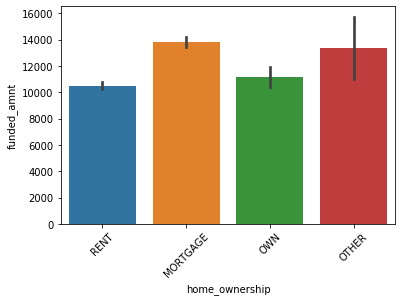

In [95]:
#Plot for Home Ownership vs Funded amount
sns.barplot(x='home_ownership',y='funded_amnt',data=df_default)
plt.xticks(rotation=45)
plt.show()

In [96]:
#Observation: Mortgage and other home ownership were more defaulted

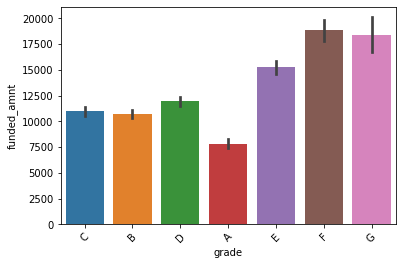

In [97]:
#Plot for Grade vs Funded Amount
sns.barplot(x='grade',y='funded_amnt',data=df_default)
plt.xticks(rotation=45)
plt.show()

In [98]:
#Observation: For Grades F, G and E there was more default in funded amount

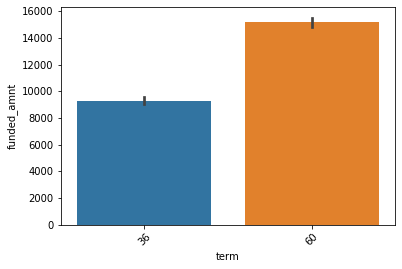

In [99]:
#Plot for Term vs Funded Amount
sns.barplot(x='term',y='funded_amnt',data=df_default)
plt.xticks(rotation=45)
plt.show()

In [100]:
#Observation: Loans offered for term 60 months caused more defualt to funded amount

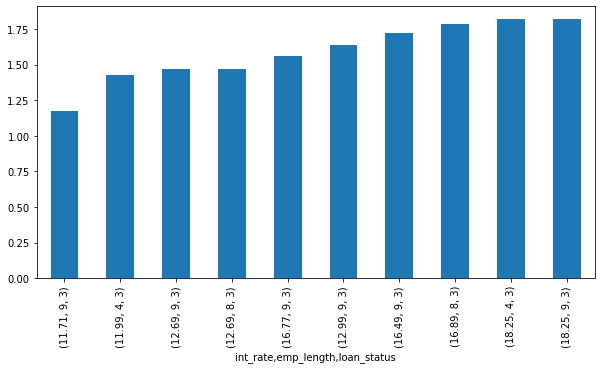

In [101]:
# Plotting of int rate, emp length and loan status with top 10 
plt.figure(figsize=(10,5))
(df_default.groupby(['int_rate','emp_length','loan_status'])['loan_status'].count().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(10).plot.bar()
plt.show()

In [102]:

plt.figure(figsize=(10,5))
(df_default.int_rate.value_counts().head(10))


13.49    115
11.49    108
10.99     86
11.71     85
11.99     70
12.69     68
14.27     66
16.77     64
12.99     61
16.49     58
Name: int_rate, dtype: int64

<Figure size 720x360 with 0 Axes>

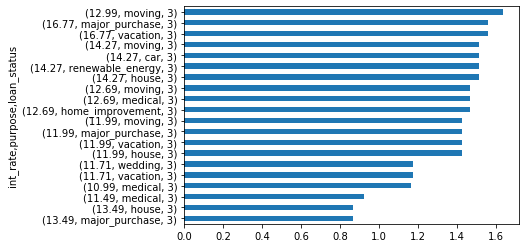

In [103]:
# Plotting of int rate, purpose and loan status
(df_default.groupby(['int_rate','purpose','loan_status'])['loan_status'].count().groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))).sort_values().head(20).plot.barh()
plt.show()

### We performed bivariate analysis with loan status (charged off or defaulted) and comparing it with other variables like term, annual income, employee experience, DTI, funded amount, home ownership, grade, state,  and interest rate

### Summary of Bivariate Analysis
    1. With 36 term with exp <4 years and 60 term with >10 years exp more likely to default
    2. Term 36 and Other is more likely to default
    3. 36 and Low income more likely to default
    4. With any range of income debt_consolidation comes as the highest defaulter
    5. With High or Medium income >10years exp  or Low income with <=1 year exp with medium 1 year exp is likely to default
    6. With experience >7 years, and loan purpose like educational or wedding are likely to default
    7. For medium DTI, with experience in range 6 to 8 years likely to default
    8. For High  DTI, with 7 years of experience is likely to default
    9. Educational, vacation and wedding seems to default more across the DTI
    10.With High DTI and open accounts in range 31 to 34, and Medium with 27 open accounts they are more likely to default
    11.More funded amount was defaulted in small business followed by debt consolidation and house
    12.Mortgage and other home ownership were more defaulted
    13.For Grades F, G and E there was more default in funded amount
    14.Loans offered for term 60 months caused more default to funded amount
    15.For most purposes, interest rate >=11% amount for the most number of defaulters


## US Geo Plot for better understanding

In [104]:
# Prepring data  plot Geo Grouping by other metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df_default.groupby(['addr_state'], as_index=False).funded_amnt.sum()
by_interest_rate = df_default.groupby([ 'addr_state'], as_index=False).int_rate.mean()
by_income = df_default.groupby([ 'addr_state'], as_index=False).annual_inc.mean()
by_dti = df_default.groupby(['addr_state'], as_index=False).dti.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_funded_amounts = by_loan_amount['funded_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()
average_dti = by_dti['dti'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_funded_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income),
                           ('dti', average_dti),])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head(100)

state_codes  issued_loans  interest_rate  annual_income    dti
0           AK        201875          15.46      100221.47  14.89
1           AL        644825          14.83       56128.32  14.66
2           AR        238100          13.70       54641.08  16.12
3           AZ       1241050          13.66       63547.10  14.04
4           CA      11704800          13.84       67138.97  13.69
5           CO        968175          13.78       58271.34  14.12
6           CT        839400          13.89       63081.26  13.35
7           DC        188500          14.43       76469.43  10.04
8           DE        126900          12.59       61086.73  14.05
9           FL       4904425          13.73       58631.78  13.75
10          GA       2208550          13.63       58901.93  14.94
11          HI        241875          14.18       58145.38  17.08
12          IL       2262225          13.78       58903.91  14.07
13          KS        308625          12.03       55746.99  14.87
14          KY        522175          14.15       51870.96  14.36
15          LA        481850          12.76       56961.48  12.98
16          MA       1721300          14.10       67073.39  14.16
17          MD       1738575          14.82       71864.62  13.69
18          MI       1056375          13.98       73946.71  14.90
19          MN        774350          13.34       53125.99  15.43
20          MO       1061450          13.51       54302.69  15.81
21          MS          3000          15.37       60000.00   1.00
22          MT        111150          13.72       68955.33  14.80
23          NC       1185900          14.28       53815.82  14.10
24          NH        293300          13.12       75143.45  15.41
25          NJ       3124575          14.00       62365.56  14.13
26          NM        279575          12.33       52483.86  14.07
27          NV       1097650          14.32       72330.54  14.41
28          NY       5242575          13.95       65050.01  13.33
29          OH       1728300          14.31       59804.71  15.26
30          OK        444600          13.40       52770.51  16.55
31          OR        732925          14.32       56171.55  15.11
32          PA       1913150          13.68       61087.84  14.46
33          RI        291350          13.36       62319.32  12.61
34          SC        658925          13.93       56556.45  14.62
35          SD        109725          13.72       45936.00  15.18
36          TN         15500          11.34       69000.00   4.31
37          TX       3279000          14.40       66808.60  14.34
38          UT        464200          15.47       60430.48  13.32
39          VA       2063675          14.38       63920.06  14.80
40          VT         61600          13.43       57705.33  18.21
41          WA       1433875          13.74       61605.05  14.27
42          WI        662525          14.55       65153.49  15.11
43          WV        255375          12.43       51581.40  17.05
44          WY         59000          16.42       66666.67  18.11

In [105]:


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['interest_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_income'] + '<br>'+\
'Average DTI: ' + metrics_df['dti'] 


data = [ dict(
        type='choropleth',
        colorscale = 'Reds',
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$M USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (Hover to get the avegares for each state)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

### Summary of Geo Plot
    1. Created a sub dataframe with only defaulter data and plotted US Geo plot for better understanding
    2. CA, TX, NY, FL, IL were the top state with defaulters
    3. We can check the top averages for interest rate, annual income, funded amount